In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from collections import Counter
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="whitegrid")

In [3]:
fifa19 = pd.read_csv(r'D:\PYTHONCLASSJUPYTER\PrakashSenapati\FIFA.csv')

# Dataset Preview

In [4]:
fifa19.head(1)

Unnamed: 0      ID      Name  Age  \
0           0  158023  L. Messi   31   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   

                                  Flag  Overall  Potential          Club  ...  \
0  https://cdn.sofifa.org/flags/52.png       94         94  FC Barcelona  ...   

  Composure Marking StandingTackle  SlidingTackle GKDiving  GKHandling  \
0      96.0    33.0           28.0           26.0      6.0        11.0   

   GKKicking  GKPositioning GKReflexes Release Clause  
0       15.0           14.0        8.0        €226.5M  

[1 rows x 89 columns]

# Dataset Summary

In [ ]:
# Dataset contains 89 Attributes/Variables/Columns/Datatypes
# Numerical attributes = 44 (float-38, int-6)
# Object/Category/String attributes = 45

In [6]:
fifa19.shape

(18207, 89)

In [7]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [9]:
# fifa19.describe()

In [10]:
fifa19['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

# Explore `Age`

## Seaborn Distplot

 - Seaborn distplot() function flexibly plots a univariate distribution of observations.
 - This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions.
 - Here we will visualize distribution of 'Age' variable
 - It can be seen that the Age variable is slightly positively skewed.

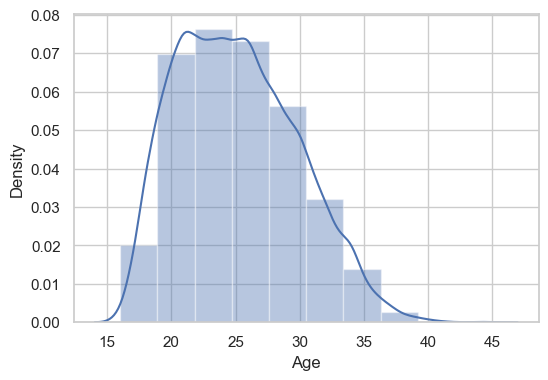

In [16]:
f, axes = plt.subplots(figsize=(6,4))
x = fifa19['Age']
axes = sns.distplot(x, bins=10)
plt.show()

**We can use Pandas series object to get an informative axis label as follows:**

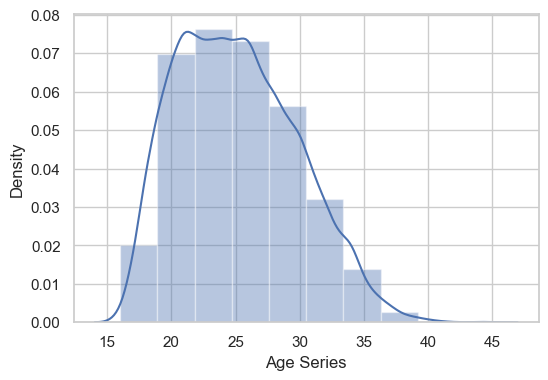

In [17]:
f, axes = plt.subplots(figsize=(6,4))
x = fifa19['Age']
x = pd.Series(x, name="Age Series")
axes = sns.distplot(x, bins=10)
plt.show()

**We can plot the distribution on the vertical axis as follows:**

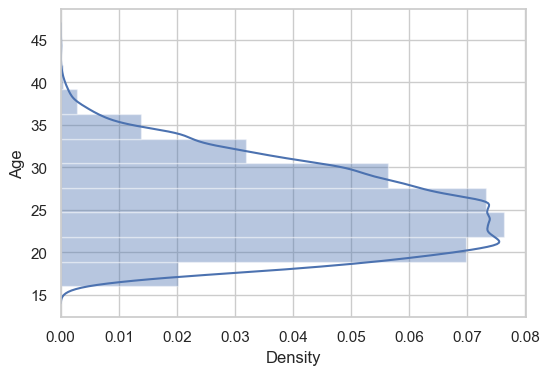

In [18]:
f, axes = plt.subplots(figsize=(6,4))
x = fifa19['Age']
axes = sns.distplot(x, bins=10, vertical=True)
plt.show()

## Seaborn Kernel Density Estimation (KDE) Plot

- The `kernel density estimate (KDE)` plot is a useful tool for plotting the shape of a distribution. 
- Seaborn kdeplot is another seaborn plotting function that fits and plot a univariate or bivariate kernel density estimate.
- Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis.

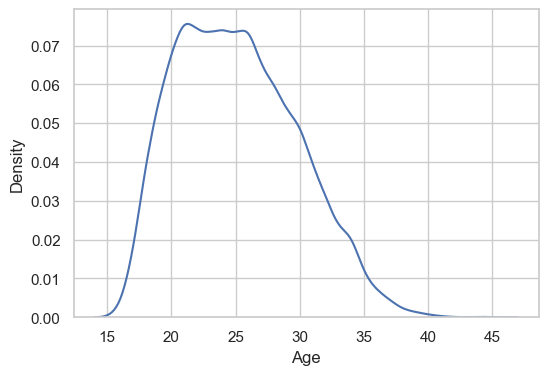

In [23]:
f, axes = plt.subplots(figsize=(6,4))
x = fifa19['Age']
x = pd.Series(x, name="Age")
axes = sns.kdeplot(x)
plt.show()

**We can shade under the density curve and use a different color as follows:**

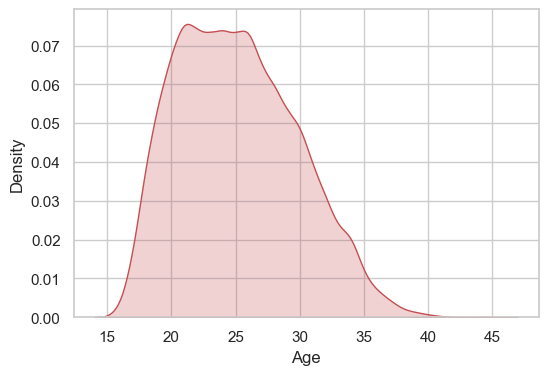

In [24]:
f, axes = plt.subplots(figsize=(6,4))
x = fifa19['Age']
x = pd.Series(x, name="Age")
axes = sns.kdeplot(x, shade=True, color='r')
plt.show()

## Seaborn Histogram

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars..  
  to show the number of observations that fall in each bin. 
- A `hist()` function already exists in matplotlib. 
- **We can use Seaborn's distplot() to plot a histogram.**

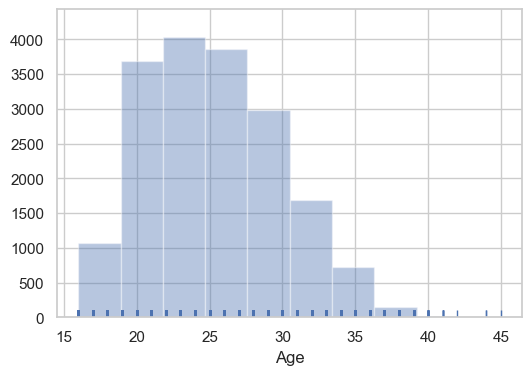

In [25]:
f, axes = plt.subplots(figsize=(6,4))
x = fifa19['Age']
axes = sns.distplot(x, bins=10, kde=False, rug=True)
plt.show()

**We can use Seaborn's distplot() to plot a Kde.**

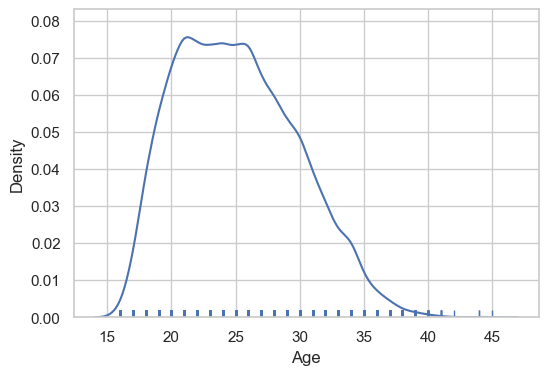

In [26]:
f, axes = plt.subplots(figsize=(6,4))
x = fifa19['Age']
axes = sns.distplot(x, bins=10, hist=False, rug=True)
plt.show()

# Explore `Preferred Foot`

In [27]:
# Check number of unique values in 'Preferred Foot' variable

fifa19['Preferred Foot'].nunique()

2

In [28]:
# Check frequency distribution of unique values in 'Preferred Foot' variable

fifa19['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

## Seaborn countplot() Function

- A countplot shows the counts of observations in each categorical bin using bars.
- It can be thought of as a histogram across a categorical, instead of quantitative, variable.
- This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

**We can visualize the distribution of 'Preferred Foot' variable with `countplot()` as follows:**

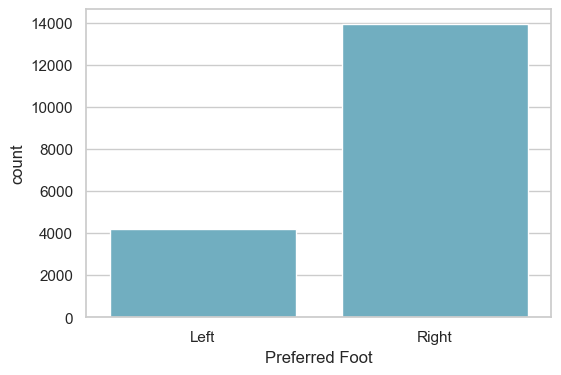

In [30]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.countplot(data=fifa19, x='Preferred Foot', color='c')
plt.show()

**We can draw plot vertically as follows:**

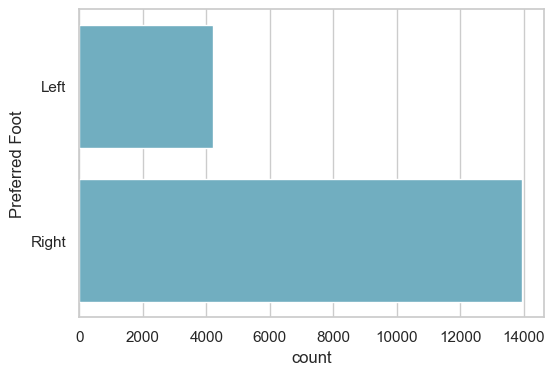

In [32]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.countplot(data=fifa19, y='Preferred Foot', color='c')
plt.show()

**We can show value counts for two categorical variables as follows:**

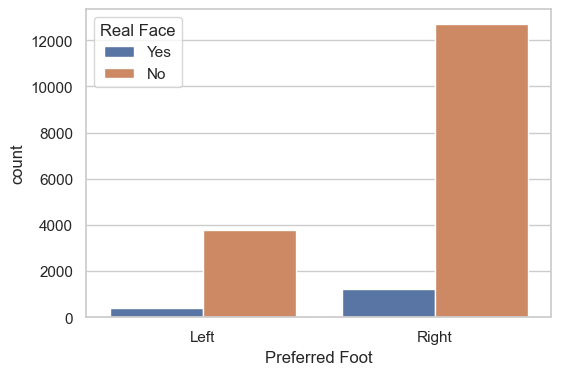

In [31]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.countplot(data=fifa19, x='Preferred Foot', hue='Real Face')
plt.show()

## Seaborn catplot() Function

- We can use Seaborn `Catplot()` function to plot categorical scatterplots.
- The default representation of the data in `catplot()` uses a scatterplot. 
- It helps to draw figure-level interface for drawing categorical plots onto a facetGrid.
- This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. 
- The `kind` parameter selects the underlying axes-level function to use.
- We can use the kind parameter to draw different plot kin to visualize the same data.

**We can use the Seaborn catplot() function to draw a countplot() as follows:**

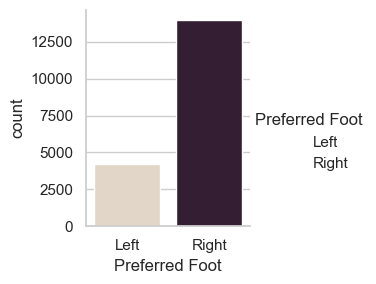

In [35]:
# f, axes = plt.subplots(figsize=(6,4)) # it is not used with catplot()

axes = sns.catplot(data=fifa19, x='Preferred Foot', kind='count', palette='ch:.25', height=3, aspect=1)
plt.show()

# Explore `International Reputation`

In [36]:
# Check the number of unique values in 'International Reputation' variable

fifa19['International Reputation'].nunique()

5

In [37]:
# Check the distribution of unique values in 'International Reputation' variable

fifa19['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

## Seaborn Stripplot() Function

- This function draws a scatterplot where one variable is categorical.
- A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where we want to show all observations along with some representation of the underlying distribution.

**We will plot a stripplot with `International Reputation` as categorical variable and `Potential` as the other variable.**

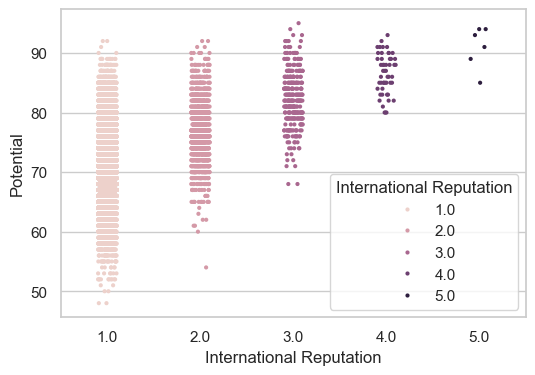

In [49]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.stripplot(
    data=fifa19, 
    x='International Reputation', 
    y='Potential', 
    hue='International Reputation', 
    size=3,
    jitter=0.1
)

plt.show()

**We can add jitter to bring out the distribution of values as follows:**

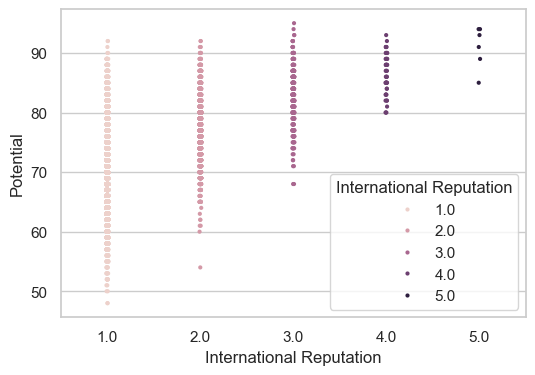

In [50]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.stripplot(
    data=fifa19, 
    x='International Reputation', 
    y='Potential', 
    hue='International Reputation', 
    size=3,
    jitter=0.01
)

plt.show()

**We can nest the strips within a second categorical variable -'Preferred Foot' as folows:**

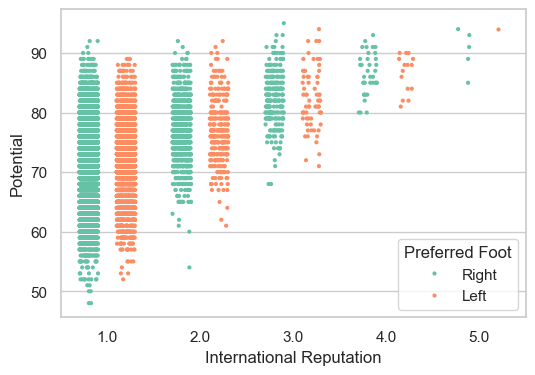

In [51]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.stripplot(
    data=fifa19, 
    x='International Reputation', 
    y='Potential', 
    hue='Preferred Foot', 
    size=3,
    jitter=0.2,
    dodge=True,
    palette='Set2'
)

plt.show()

**We can draw strips with large points and different aesthetics as follows:**

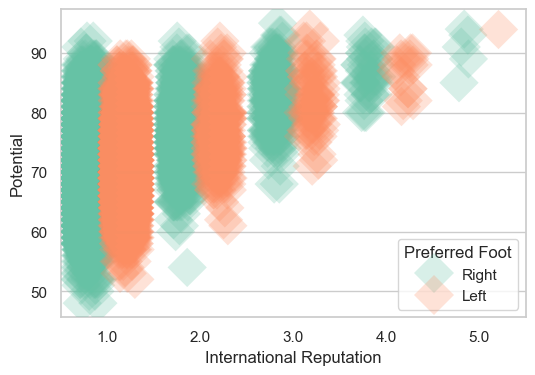

In [54]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.stripplot(
    data=fifa19, 
    x='International Reputation', 
    y='Potential', 
    hue='Preferred Foot', 
    size=20, 
    marker='D',
    edgecolor='gray',
    alpha=0.25,
    jitter=0.2,
    dodge=True,
    palette='Set2'
)

plt.show()

## Seaborn boxplot() function

- This function draws a box plot to show distributions with respect to categories.
- A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
- The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

**We will plot the boxplot of the `Potential` variable as follows:**

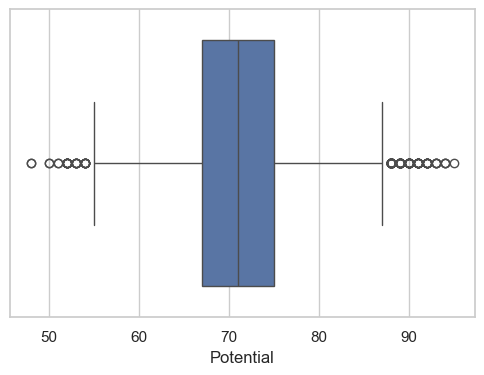

In [55]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.boxplot(data=fifa19, x='Potential')
plt.show()

**We can draw the vertical boxplot grouped by the categorical variable `International Reputation` as follows:**

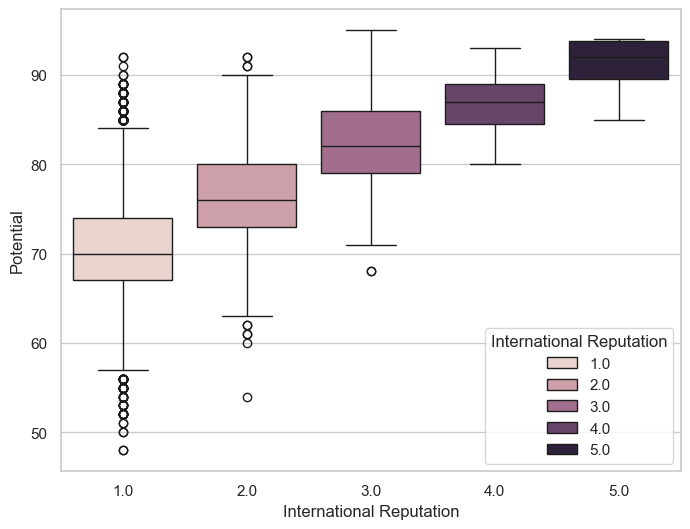

In [58]:
f, axes = plt.subplots(figsize=(8,6))
axes = sns.boxplot(data=fifa19, x='International Reputation', y='Potential', hue='International Reputation')
plt.show()

**We can draw a boxplot with nested grouping by two categorical variables as follows:**

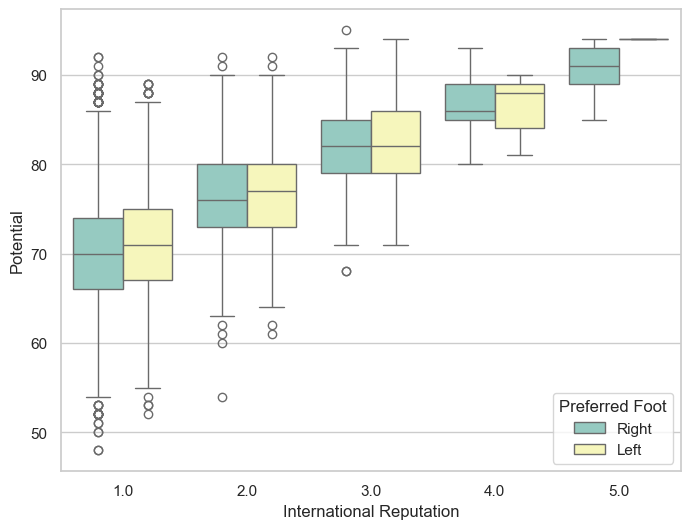

In [59]:
f, axes = plt.subplots(figsize=(8,6))

axes = sns.boxplot(
    data=fifa19, 
    x='International Reputation', 
    y='Potential', 
    hue='Preferred Foot',
    palette='Set3'
)

plt.show()

## Seaborn violinplot() function

- This function draws a combination of boxplot and kernel density estimate.
- A violin plot plays a similar role as a box and whisker plot. 
- It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. 
- Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

**We will plot the violinplot of `Potential` variable as follows:**

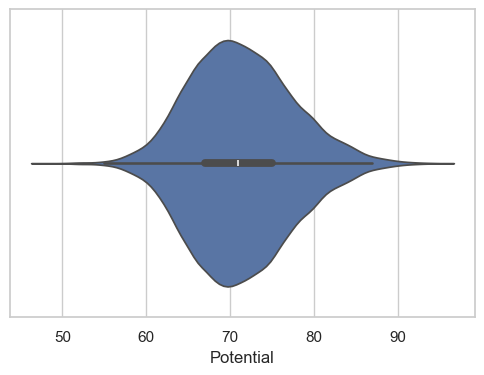

In [4]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.violinplot(data=fifa19, x='Potential')
plt.show()

**We can draw the vertical violinplot grouped by the categorical variable `International Reputation` as follows:**

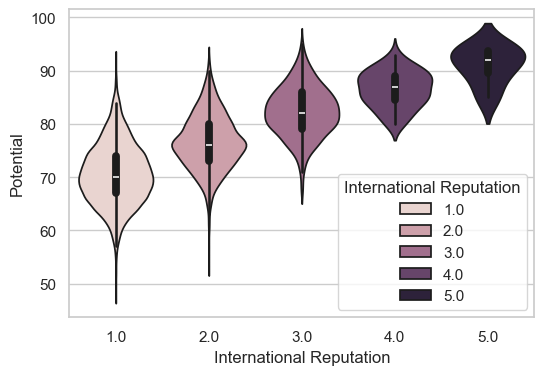

In [6]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.violinplot(data=fifa19, x='International Reputation', y='Potential', hue='International Reputation')
plt.show()

**We can draw a violinplot with nested grouping by two categorical variables as follows:**

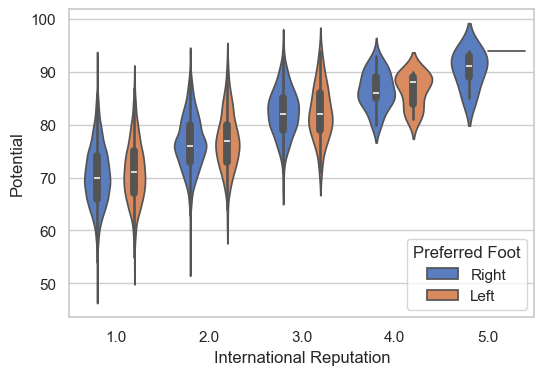

In [7]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.violinplot(data=fifa19, x='International Reputation', y='Potential', hue='Preferred Foot', palette='muted')
plt.show()

**We can draw split violins to compare the across the hue variable as follows:**

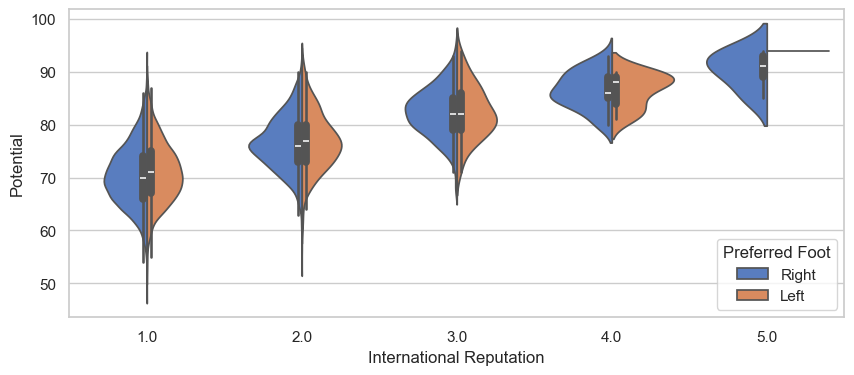

In [10]:
f, axes = plt.subplots(figsize=(10,4))
axes = sns.violinplot(data=fifa19, x='International Reputation', y='Potential', hue='Preferred Foot', palette='muted', split=True)
plt.show()

## Seaborn pointplot() function

- This function show point estimates and confidence intervals using scatter plot glyphs.
- A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

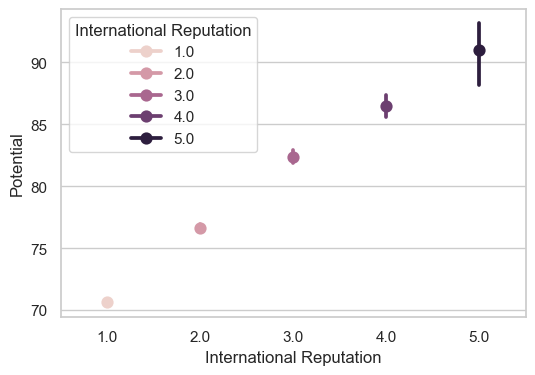

In [13]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.pointplot(data=fifa19, x='International Reputation', y='Potential', hue='International Reputation')
plt.show()

**We can draw a set of vertical points with nested grouping by a two variables as follows:**

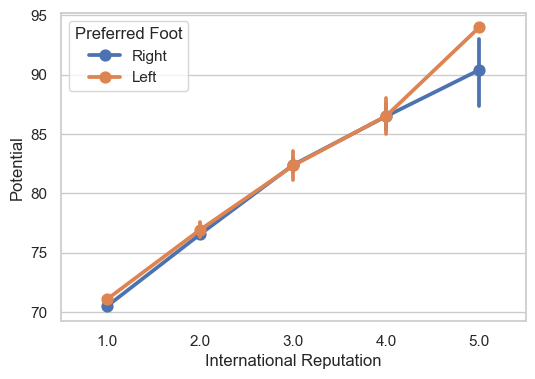

In [14]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.pointplot(data=fifa19, x='International Reputation', y='Potential', hue='Preferred Foot')
plt.show()

**We can separate the points for different hue levels along the categorical axis as follows:**

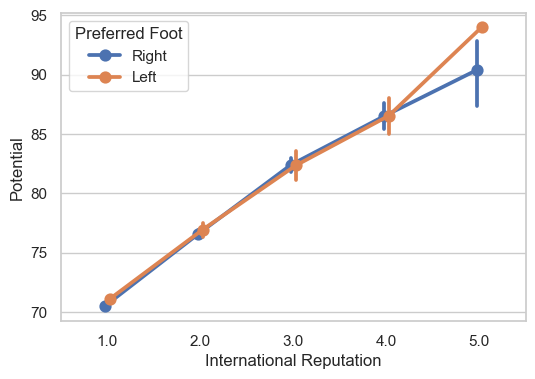

In [15]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.pointplot(data=fifa19, x='International Reputation', y='Potential', hue='Preferred Foot', dodge=True)
plt.show()

**We can use a different marker and line style for the hue levels as follows:**

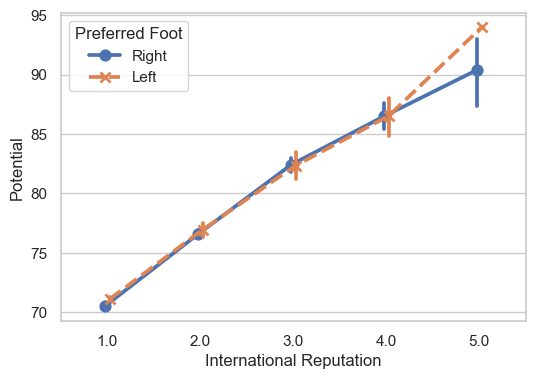

In [16]:
f, axes = plt.subplots(figsize=(6,4))

axes = sns.pointplot(
    data=fifa19, 
    x='International Reputation', 
    y='Potential', 
    hue='Preferred Foot', 
    dodge=True,
    markers=['o', 'x'],
    linestyles=['-', '--']
)

plt.show()

## Seaborn barplot() function

- This function show point estimates and confidence intervals as rectangular bars.
- A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. 
- Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

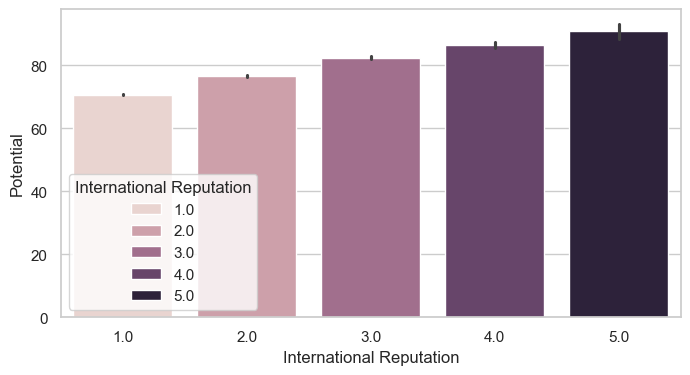

In [21]:
f, axes = plt.subplots(figsize=(8,4))
axes = sns.barplot(data=fifa19, x='International Reputation', y='Potential', hue='International Reputation')
plt.show()

**We can draw a set of vertical bars with nested grouping by a two variables as follows:**

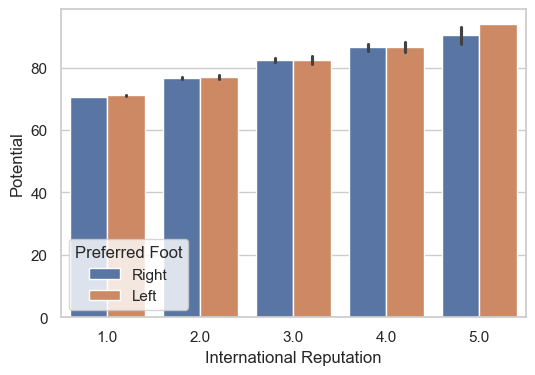

In [24]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.barplot(data=fifa19, x='International Reputation', y='Potential', hue='Preferred Foot')
plt.show()

**We can use `median` as the estimate of central tendency as follows:**

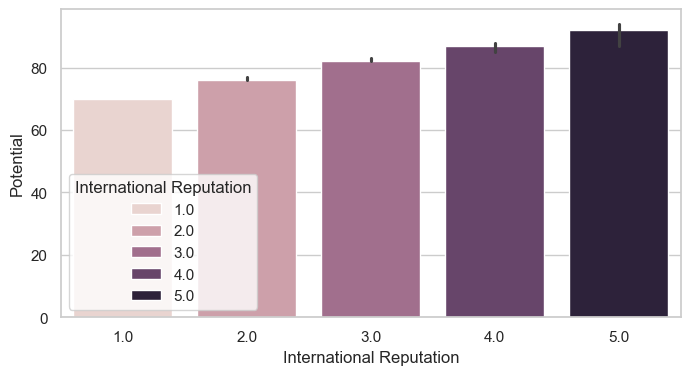

In [25]:
from numpy import median
f, axes = plt.subplots(figsize=(8,4))
axes = sns.barplot(data=fifa19, x='International Reputation', y='Potential', hue='International Reputation', estimator=median)
plt.show()

**We can show the `standard error of the mean` with the error bars as follows:**

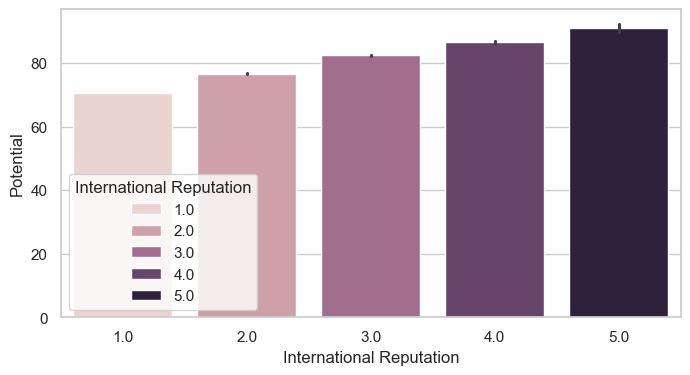

In [26]:
f, axes = plt.subplots(figsize=(8,4))
axes = sns.barplot(data=fifa19, x='International Reputation', y='Potential', hue='International Reputation', ci=68)
plt.show()

**We can show `standard deviation` of observations instead of a `confidence interval` as follows:**

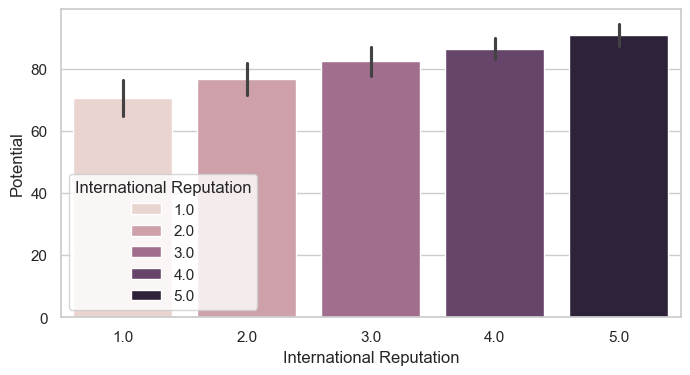

In [27]:
f, axes = plt.subplots(figsize=(8,4))
axes = sns.barplot(data=fifa19, x='International Reputation', y='Potential', hue='International Reputation', ci='sd')
plt.show()

**We can add `caps` to the `error bars` as follows:**

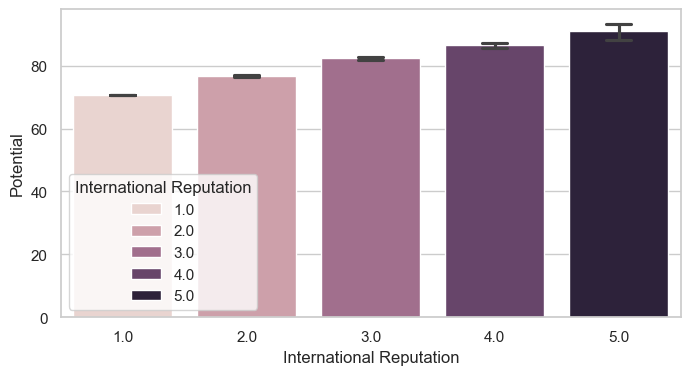

In [28]:
f, axes = plt.subplots(figsize=(8,4))
axes = sns.barplot(data=fifa19, x='International Reputation', y='Potential', hue='International Reputation', capsize=0.2)
plt.show()

# Explore `Overall`, `Potential`, `Height`, `Weight`

## Seaborn relplot() Function

- Seaborn `relplot()` function helps us to draw figure-level interface for drawing relational plots onto a FacetGrid.
- This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. 
- The `kind` parameter selects the underlying axes-level function to use-
   - scatterplot() (with kind="scatter"; the default)
   - lineplot() (with kind="line")

**We can plot a scatterplot with variables `Heigh` and `Weight` with Seaborn `relplot()` function as follows:**

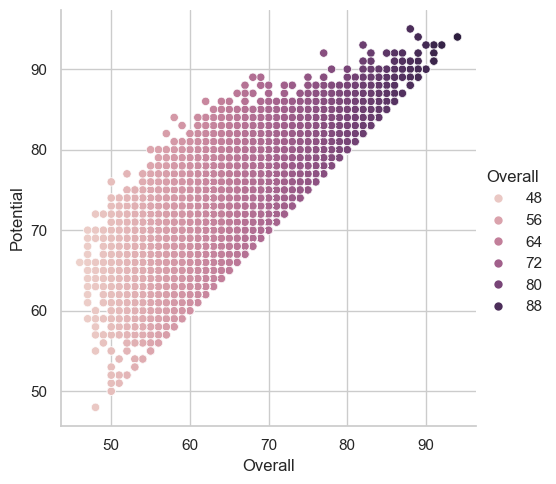

In [30]:
# f, axes = plt.subplots(figsize=(6,4)) # it is not used with relplot()

axes = sns.relplot(data=fifa19, x='Overall', y='Potential', hue='Overall')
plt.show()

## Seaborn scatterplot() Function

- This function draws a scatter plot with possibility of several semantic groups.
- The relationship between x and y can be shown for different subsets of the data using the `hue`, `size` and `style` parameters. 
- These parameters control what visual semantics are used to identify the different subsets.

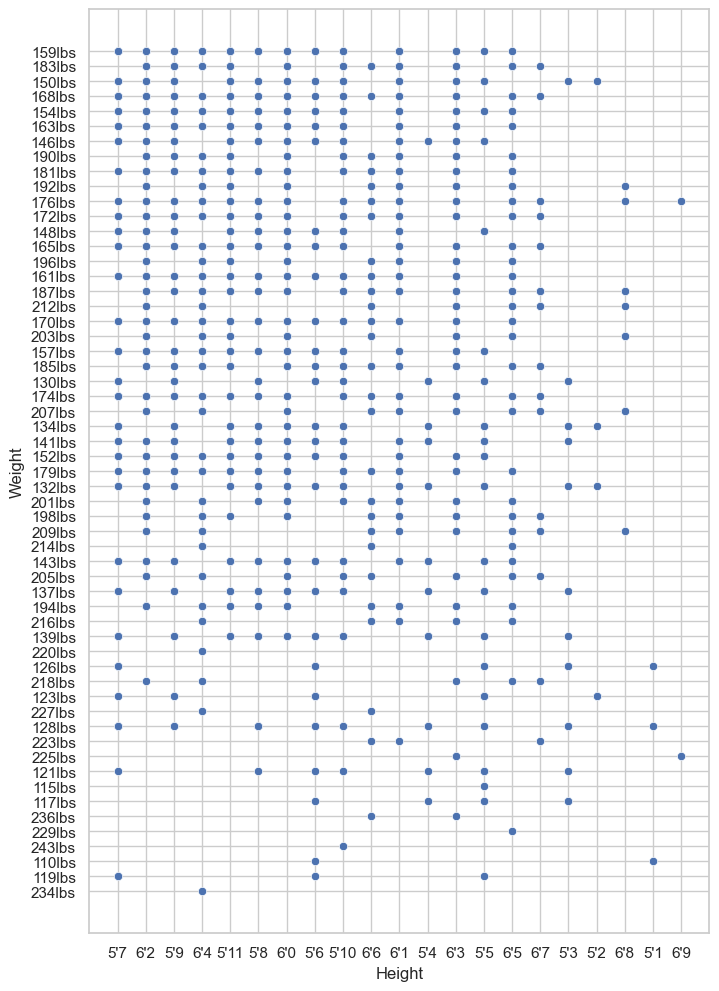

In [36]:
f, axes = plt.subplots(figsize=(8,12))
axes = sns.scatterplot(data=fifa19, x='Height', y='Weight')
plt.show()

## Seaborn lineplot() Function

- THis function draws a line plot with possibility of several semantic groupings.
- The relationship between x and y can be shown for different subsets of the data using the `hue`, `size` and `style` parameters. 
- These parameters control what visual semantics are used to identify the different subsets.

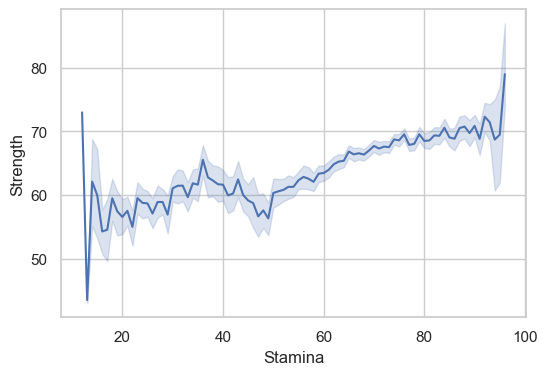

In [39]:
f, axes = plt.subplots(figsize=(6,4))
axes = sns.lineplot(data=fifa19, x='Stamina', y='Strength')
plt.show()

## Seaborn regplot() Function

- This function plots data and a linear regression model fit.

**We can plot a linear regression model between `Overall` and `Potential` variable with `regplot()` function as follows:**

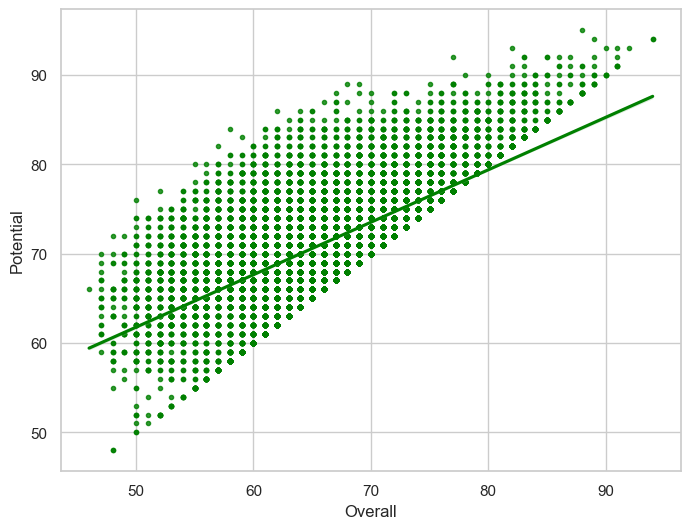

In [8]:
f, axes = plt.subplots(figsize=(8,6))
axes = sns.regplot(data=fifa19, x='Overall', y='Potential', marker='.', color='green')
plt.show()

**We can use a different color and marker as follows:**

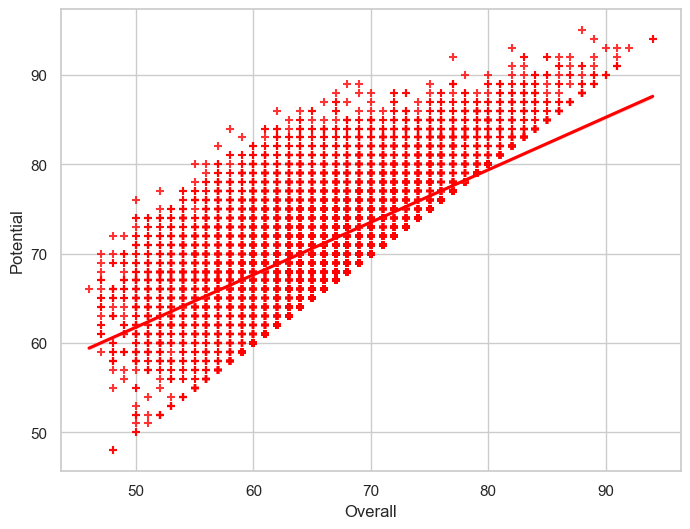

In [9]:
f, axes = plt.subplots(figsize=(8,6))
axes = sns.regplot(data=fifa19, x='Overall', y='Potential', marker='+', color='red')
plt.show()

**We can plot with a discrete variable and add some jitter as follows:**

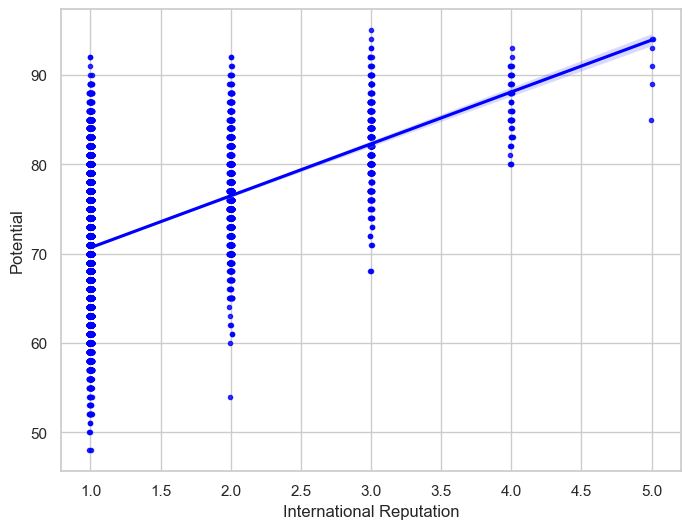

In [11]:
f, axes = plt.subplots(figsize=(8,6))
axes = sns.regplot(data=fifa19, x='International Reputation', y='Potential', marker='.', color='blue', x_jitter=0.01)
plt.show()

## Seaborn lmplot() function

- This function plots data and regression model fits across a FacetGrid.
- This function combines `regplot()` and `FacetGrid`. 
- It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

**We can plot a linear regression model between `Overall` and `Potential` variable with `lmplot()` function as follows:**

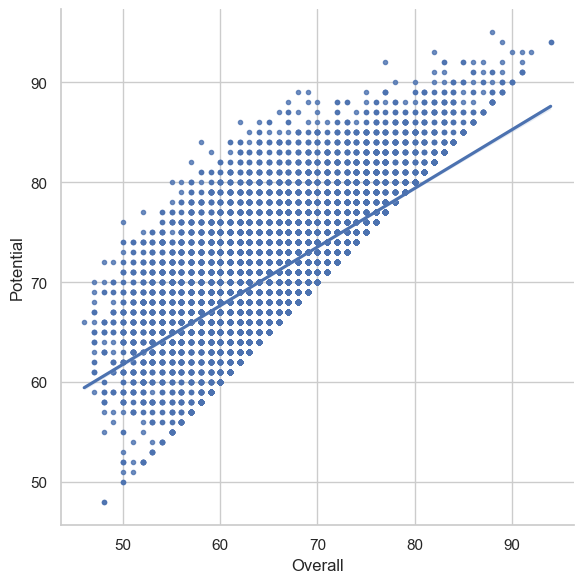

In [18]:
axes = sns.lmplot(data=fifa19, x='Overall', y='Potential', markers='.', height=6, aspect=1)
plt.show()

**We can condition on a third variable and plot the levels in different colors as follows:**

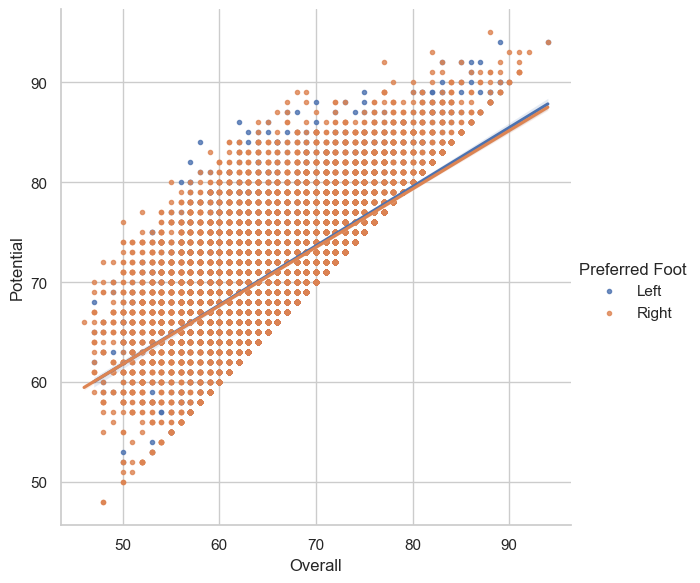

In [19]:
axes = sns.lmplot(data=fifa19, x='Overall', y='Potential', hue='Preferred Foot', markers='.', height=6, aspect=1)
plt.show()

**We can use a different color palette as follows:**

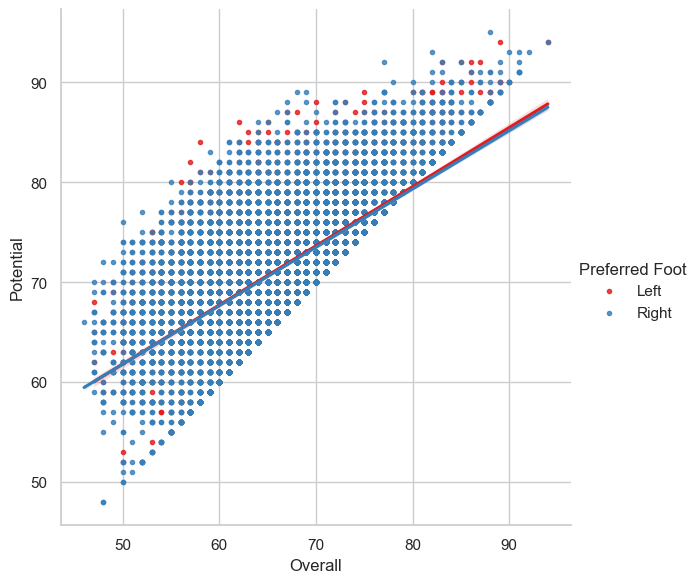

In [20]:
axes = sns.lmplot(
    data=fifa19, 
    x='Overall', 
    y='Potential', 
    hue='Preferred Foot', 
    markers='.', 
    height=6, 
    aspect=1,
    palette='Set1'
)

plt.show()

**We can plot the levels of the third variable across different columns as follows:**

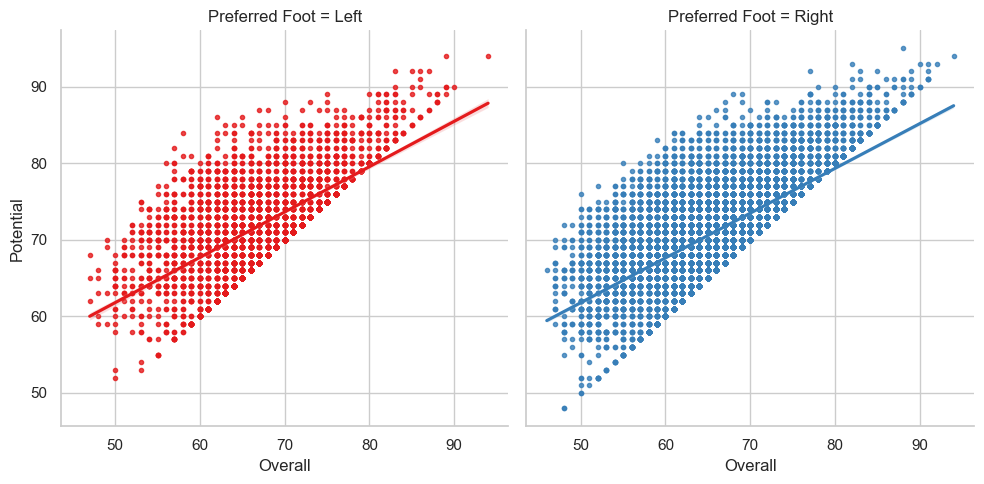

In [29]:
axes = sns.lmplot(
    data=fifa19, 
    x='Overall', 
    y='Potential', 
    col='Preferred Foot',
    hue='Preferred Foot',
    markers='.', 
    height=5, 
    aspect=1,
    palette='Set1'
)

plt.show()

# Multi Grids Plot

## Seaborn FacetGrid() Function

 - Used for Multi-plot grids
 - The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. 
- A FacetGrid can be drawn with up to three dimensions - `row`, `col` and `hue`. The first two have obvious correspondence with the resulting array of axes - the `hue` variable is a third dimension along a depth axis, where different levels are plotted with different colors.
- The class is used by initializing a FacetGrid object with a dataframe and the names of the variables that will form the `row`, `column` or `hue` dimensions of the grid. 
- These variables should be categorical or discrete, and then the data at each level of the variable will be used for a facet along that axis.

**We can initialize a 1x2 grid of facets using the fifa19 dataset:**

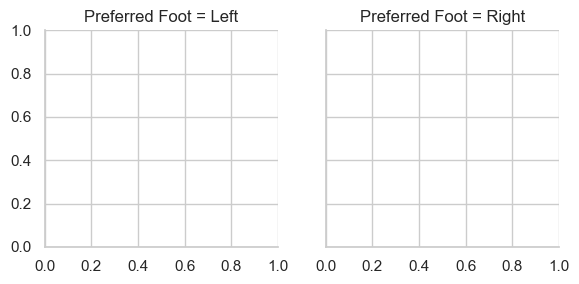

In [30]:
g = sns.FacetGrid(fifa19, col='Preferred Foot')
plt.show()

**We can draw a univariate plot of `Potential` variable on each facet as follows:**

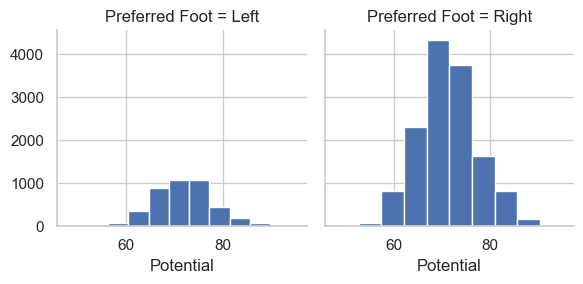

In [31]:
g = sns.FacetGrid(fifa19, col='Preferred Foot')
g = g.map(plt.hist, 'Potential')
plt.show()

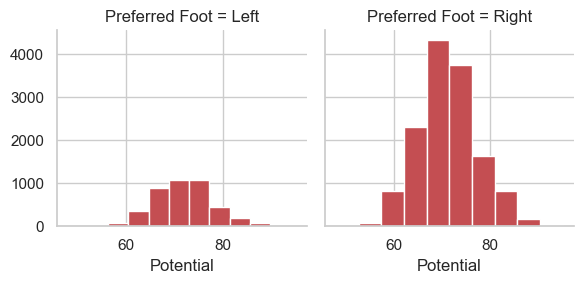

In [32]:
g = sns.FacetGrid(fifa19, col='Preferred Foot')
g = g.map(plt.hist, 'Potential', bins=10, color='r')
plt.show()

**We can plot a bivariate function on each facet as follows:**

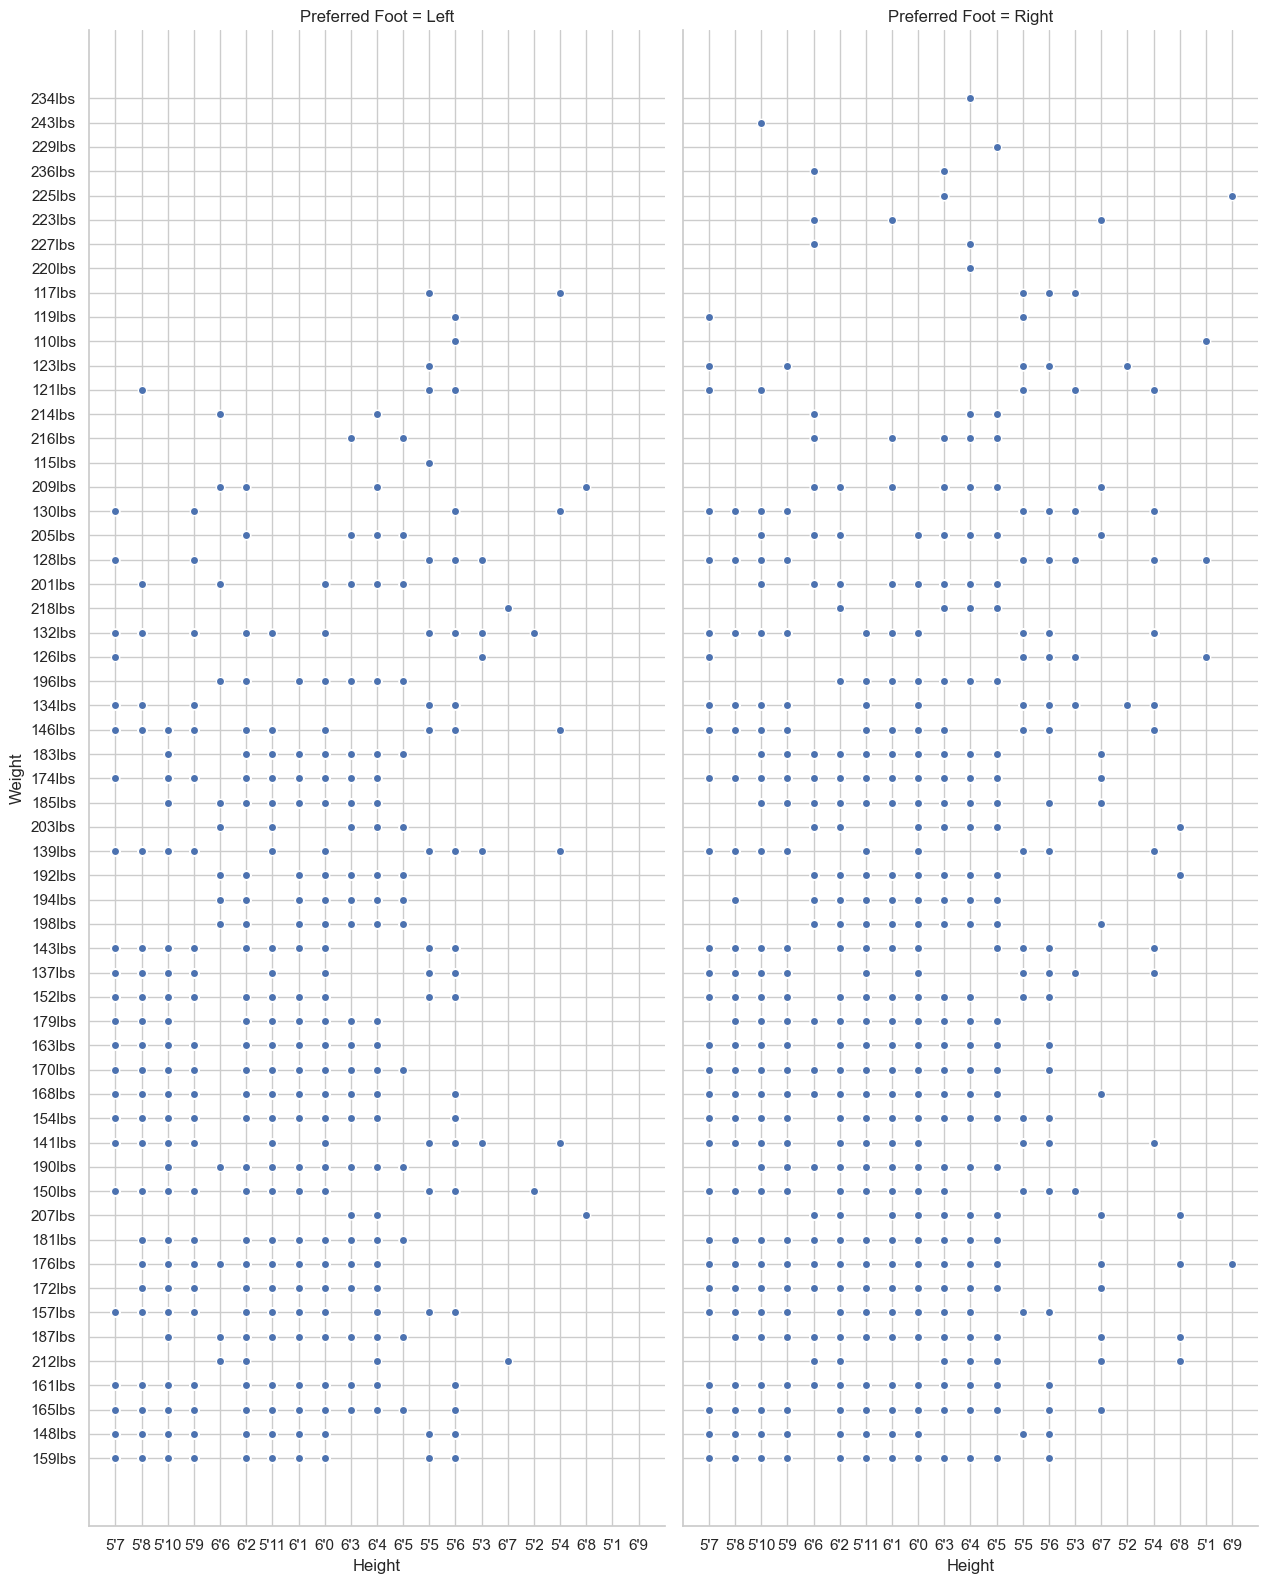

In [47]:
g = sns.FacetGrid(fifa19, col='Preferred Foot', height=16, aspect=0.4)
g = g.map(plt.scatter, 'Height', 'Weight', edgecolor='w', marker='o').add_legend()
plt.show()

**The size of the figure is set by providing the height of each facet, along with the aspect ratio:**

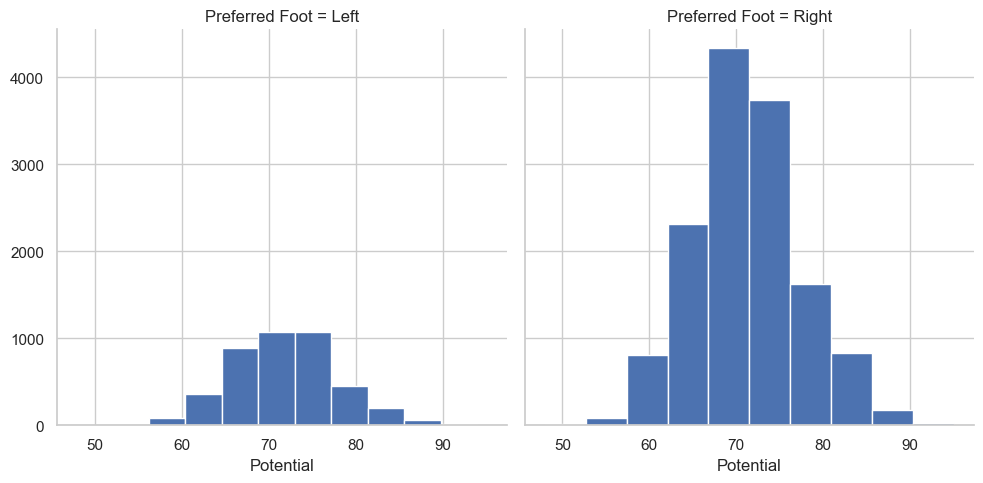

In [48]:
g = sns.FacetGrid(fifa19, col='Preferred Foot', height=5, aspect=1)
g = g.map(plt.hist, 'Potential')
plt.show()

## Seaborn PairGrid() Function

- This function plots subplot grid for plotting pairwise relationships in a dataset.
- This class maps each variable in a dataset onto a column and row in a grid of multiple axes. 
- Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.
- It can also represent an additional level of conditionalization with the hue parameter, which plots different subets of data in different colors. 
- This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

In [49]:
fifa19_new = fifa19[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

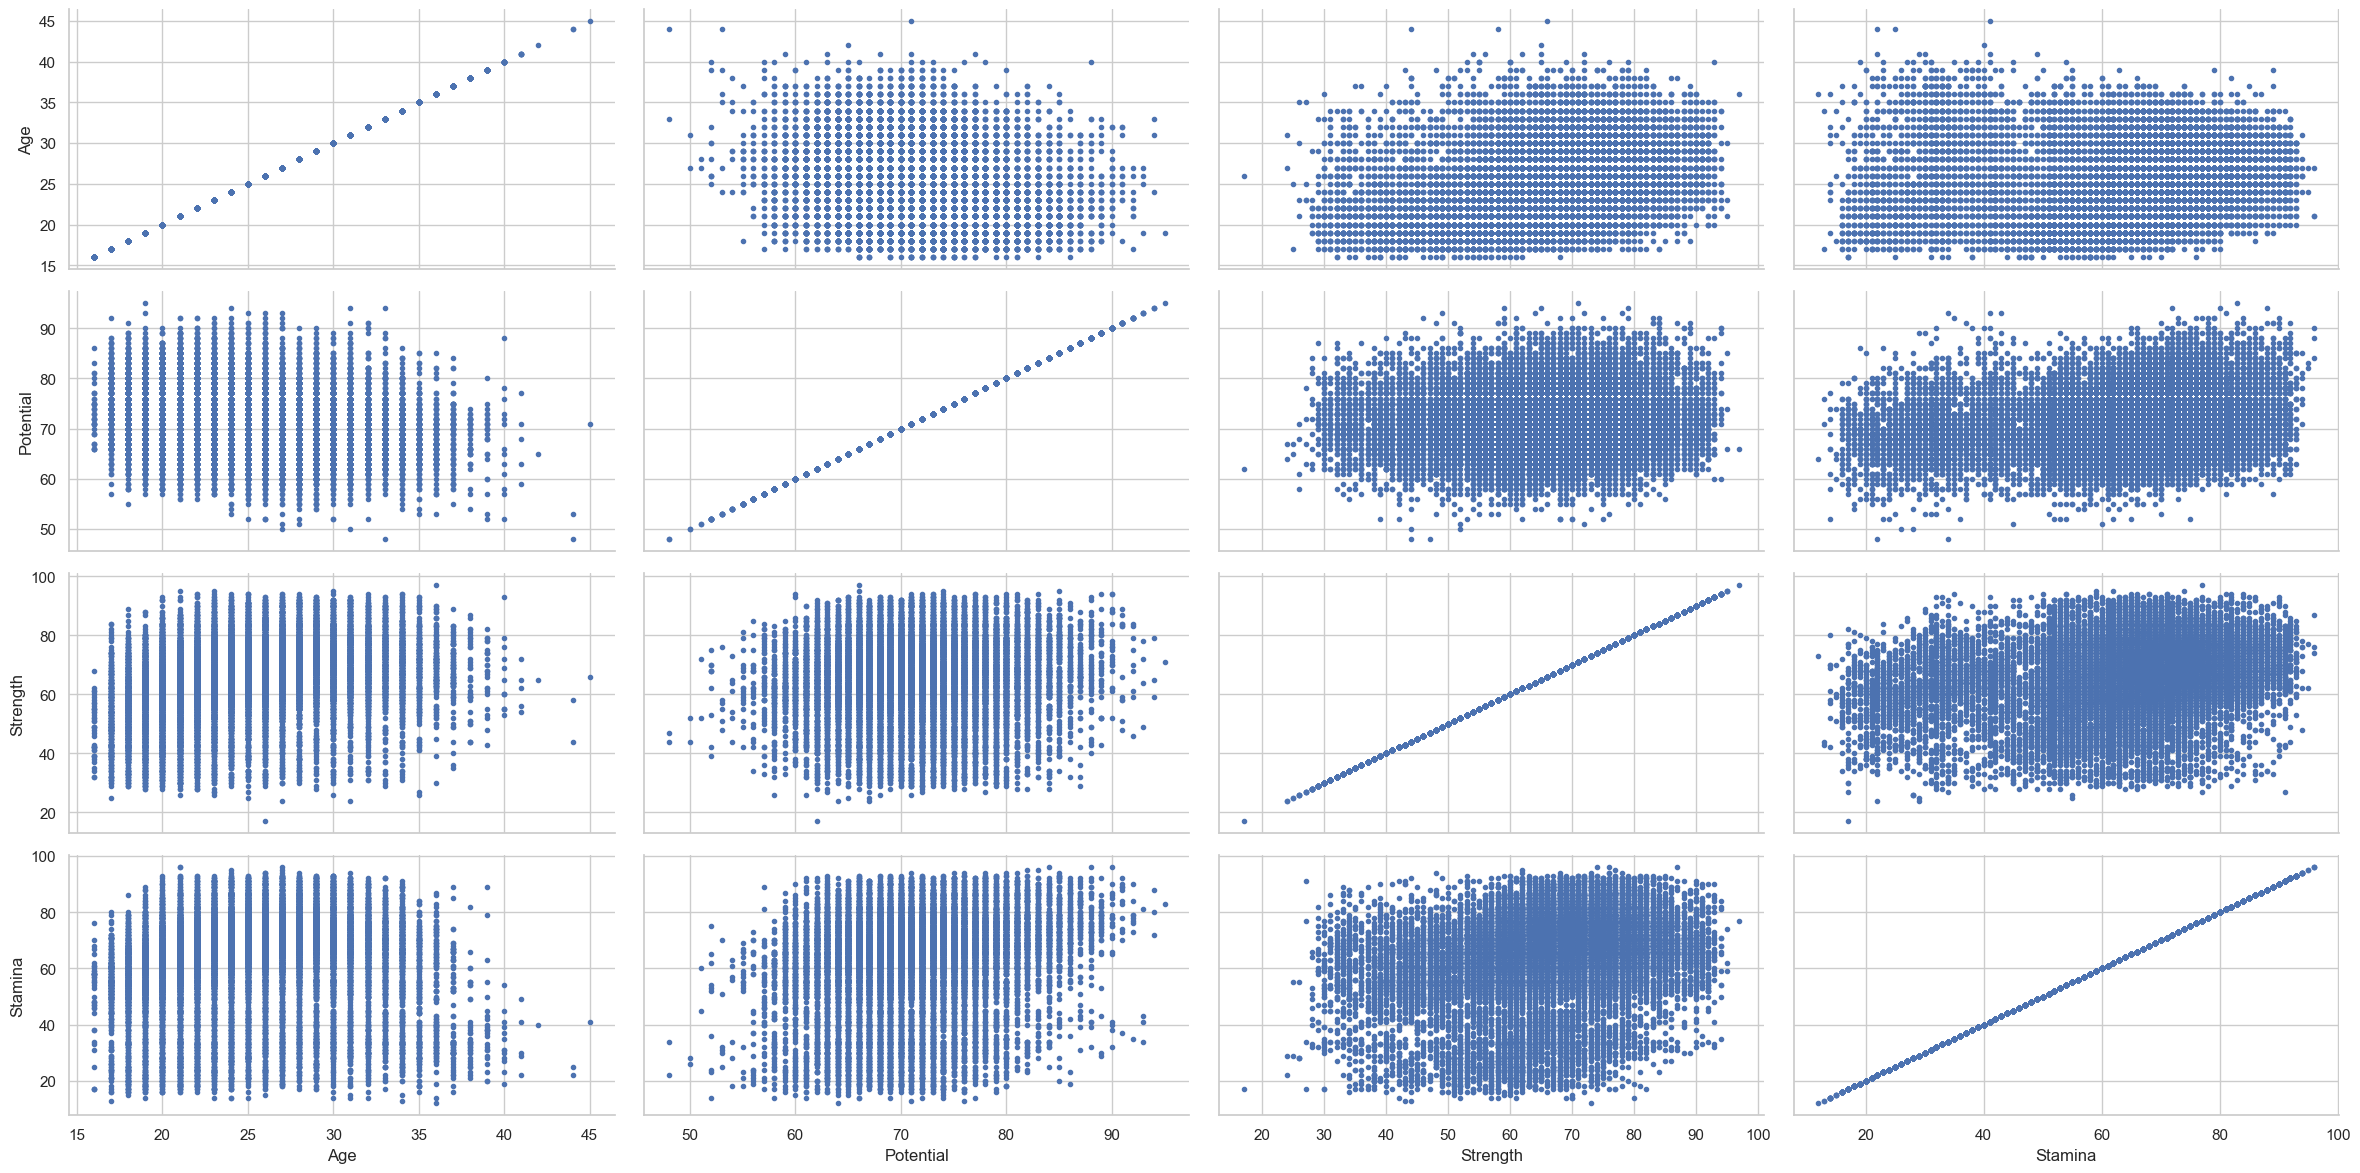

In [56]:
g = sns.PairGrid(fifa19_new, palette='viridis', height=3, aspect=2)
g = g.map(plt.scatter, marker='.')
plt.show()

**We can show a univariate distribution on the diagonal as follows:**

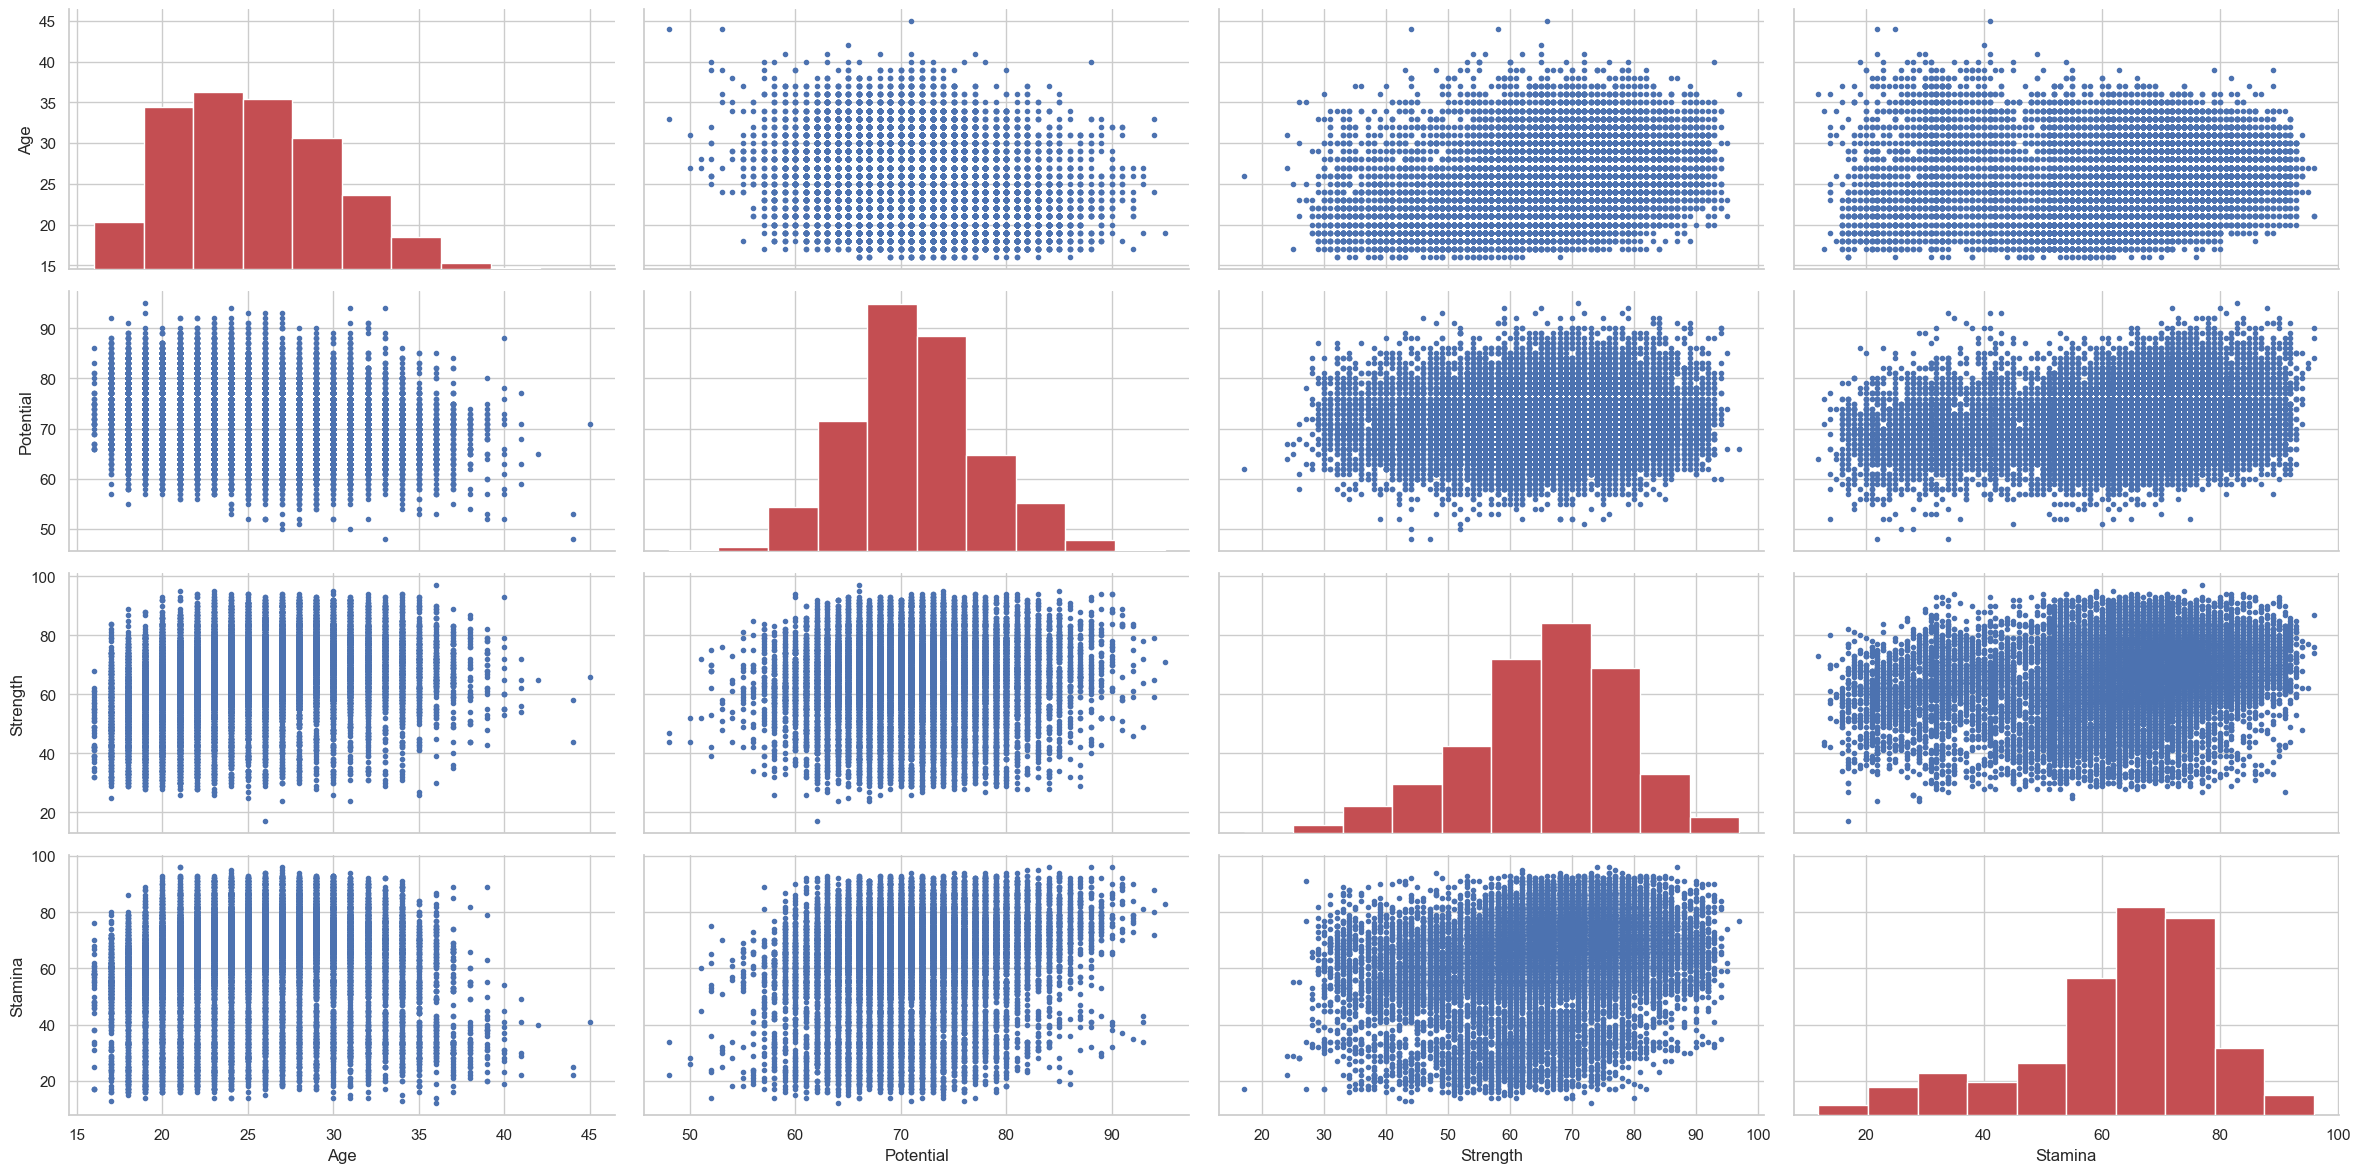

In [57]:
g = sns.PairGrid(fifa19_new, palette='viridis', height=3, aspect=2)
g = g.map_diag(plt.hist, bins=10, color='r')
g = g.map_offdiag(plt.scatter, marker='.')
plt.show()

**We can color the points using the categorical variable `Preferred Foot` as follows:**

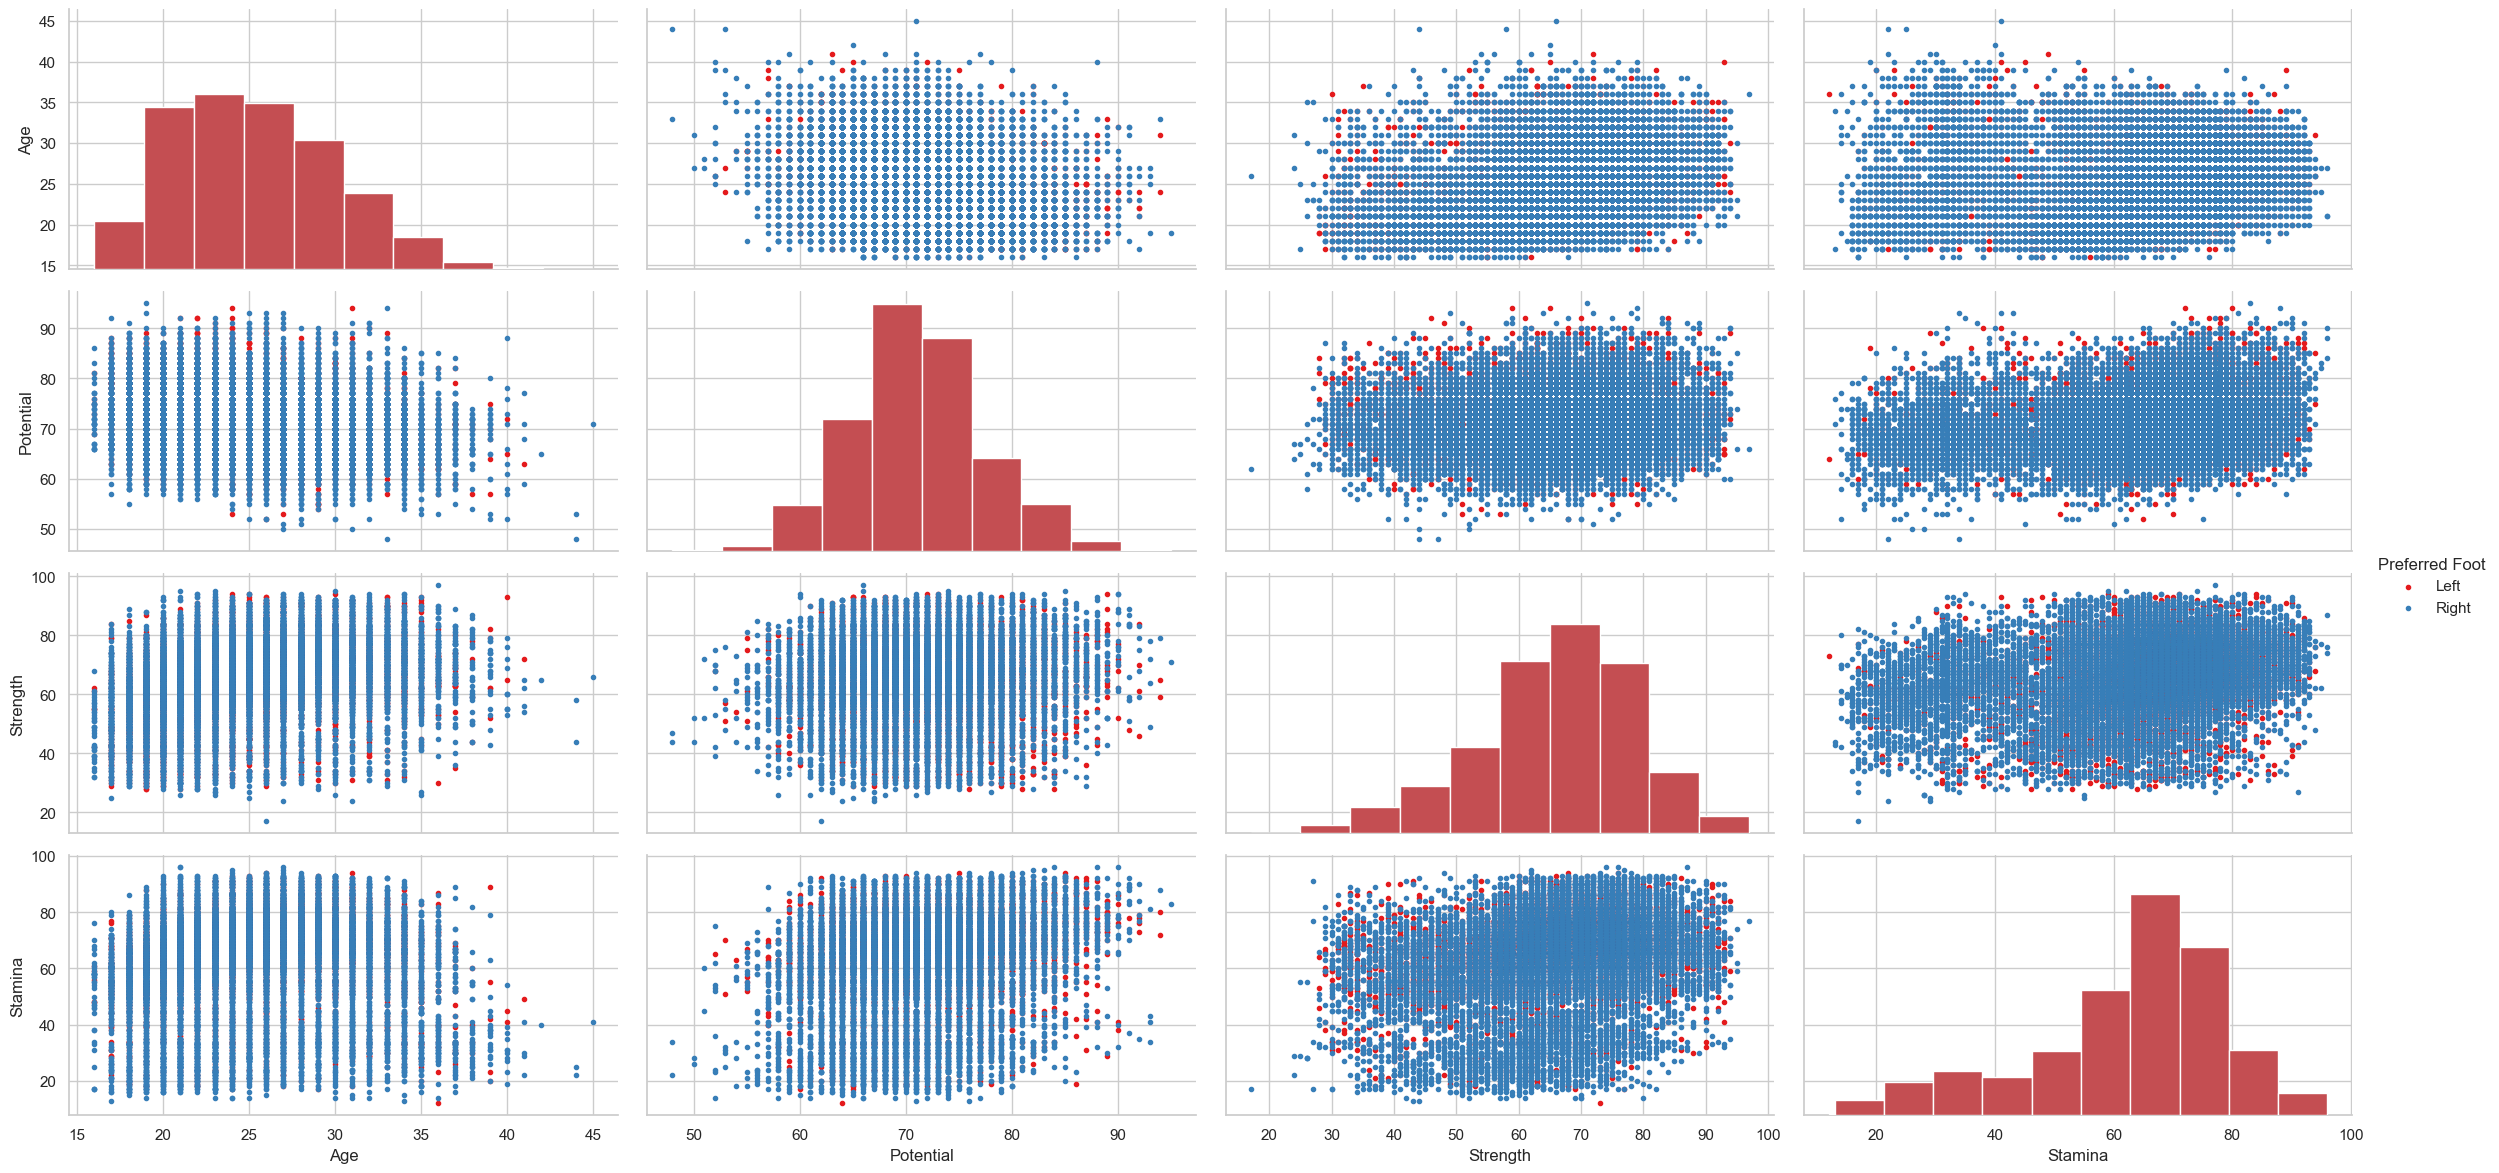

In [62]:
g = sns.PairGrid(fifa19_new, hue='Preferred Foot', palette='Set1', height=3, aspect=2)
g = g.map_diag(plt.hist, bins=10, color='r')
g = g.map_offdiag(plt.scatter, marker='.')
g = g.add_legend()
plt.show()

**We can use a different style to show multiple histograms as follows:**

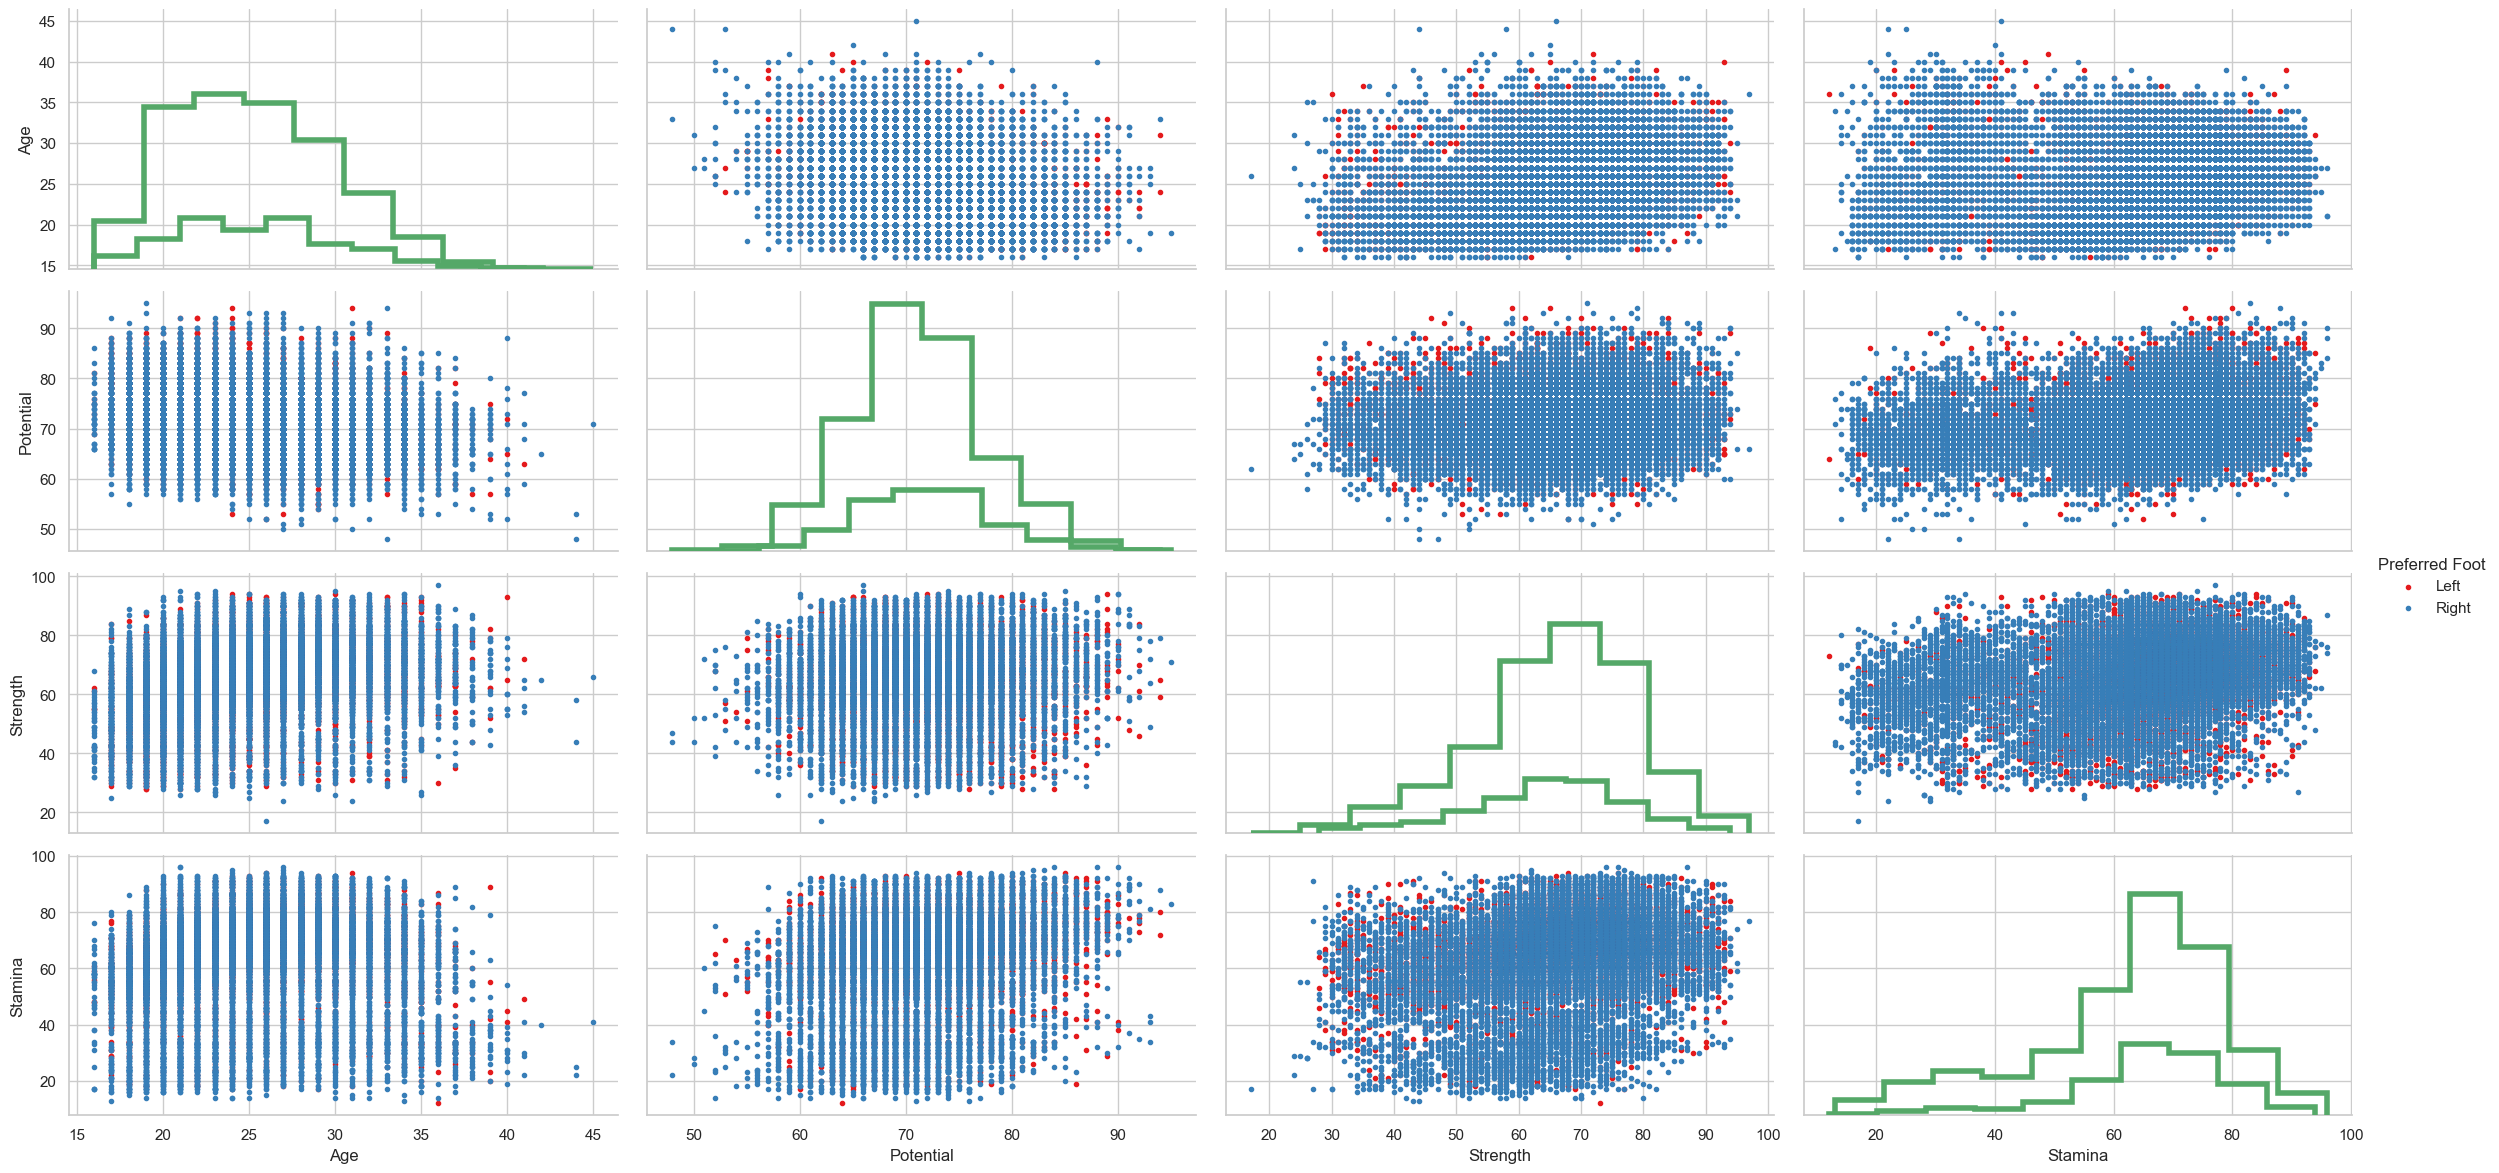

In [65]:
g = sns.PairGrid(fifa19_new, hue='Preferred Foot', palette='Set1', height=3, aspect=2)
g = g.map_diag(plt.hist, histtype='step', linewidth=4, bins=10, color='g')
g = g.map_offdiag(plt.scatter, marker='.')
g = g.add_legend()
plt.show()

**We can plot a subset of variables as follows:**

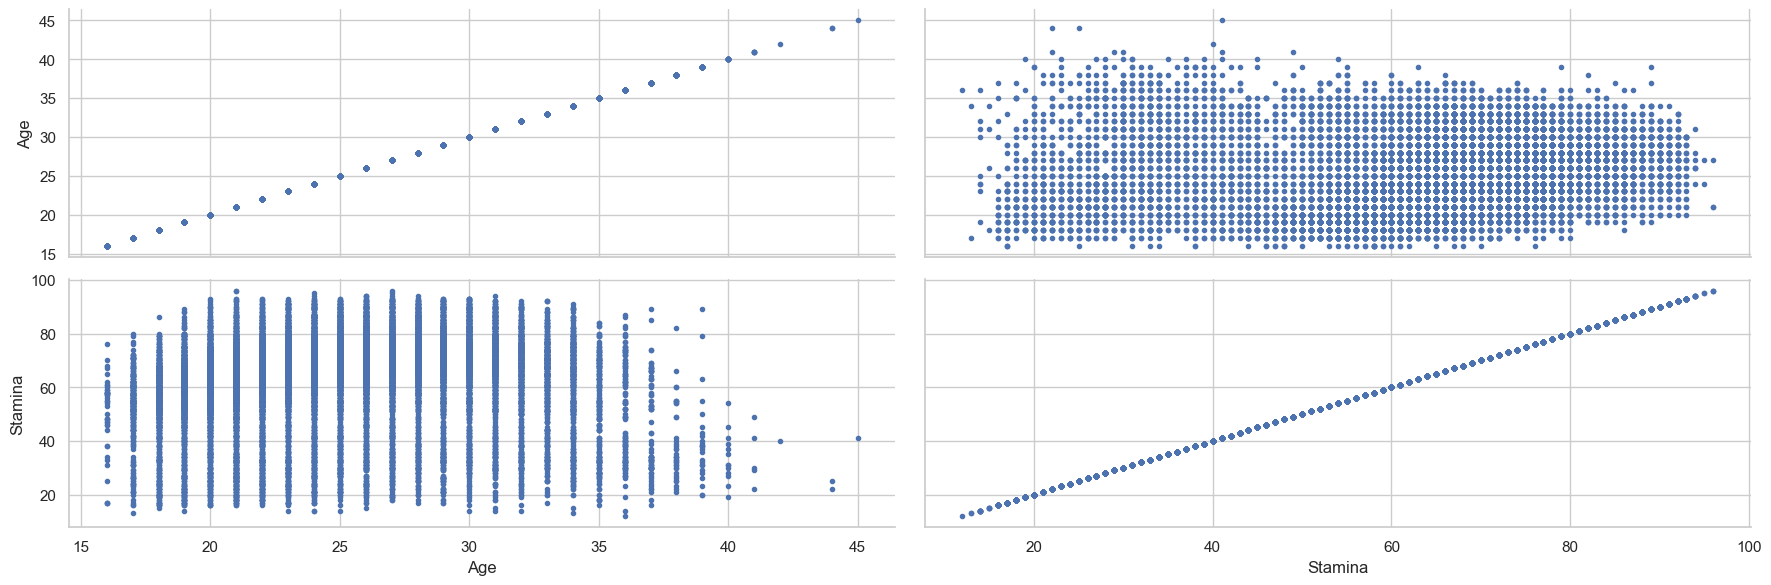

In [72]:
g = sns.PairGrid(fifa19_new, vars=['Age', 'Stamina'], height=3, aspect=3)
g = g.map(plt.scatter, marker='.')
plt.show()

**We can use different functions on the upper and lower triangles as follows:**

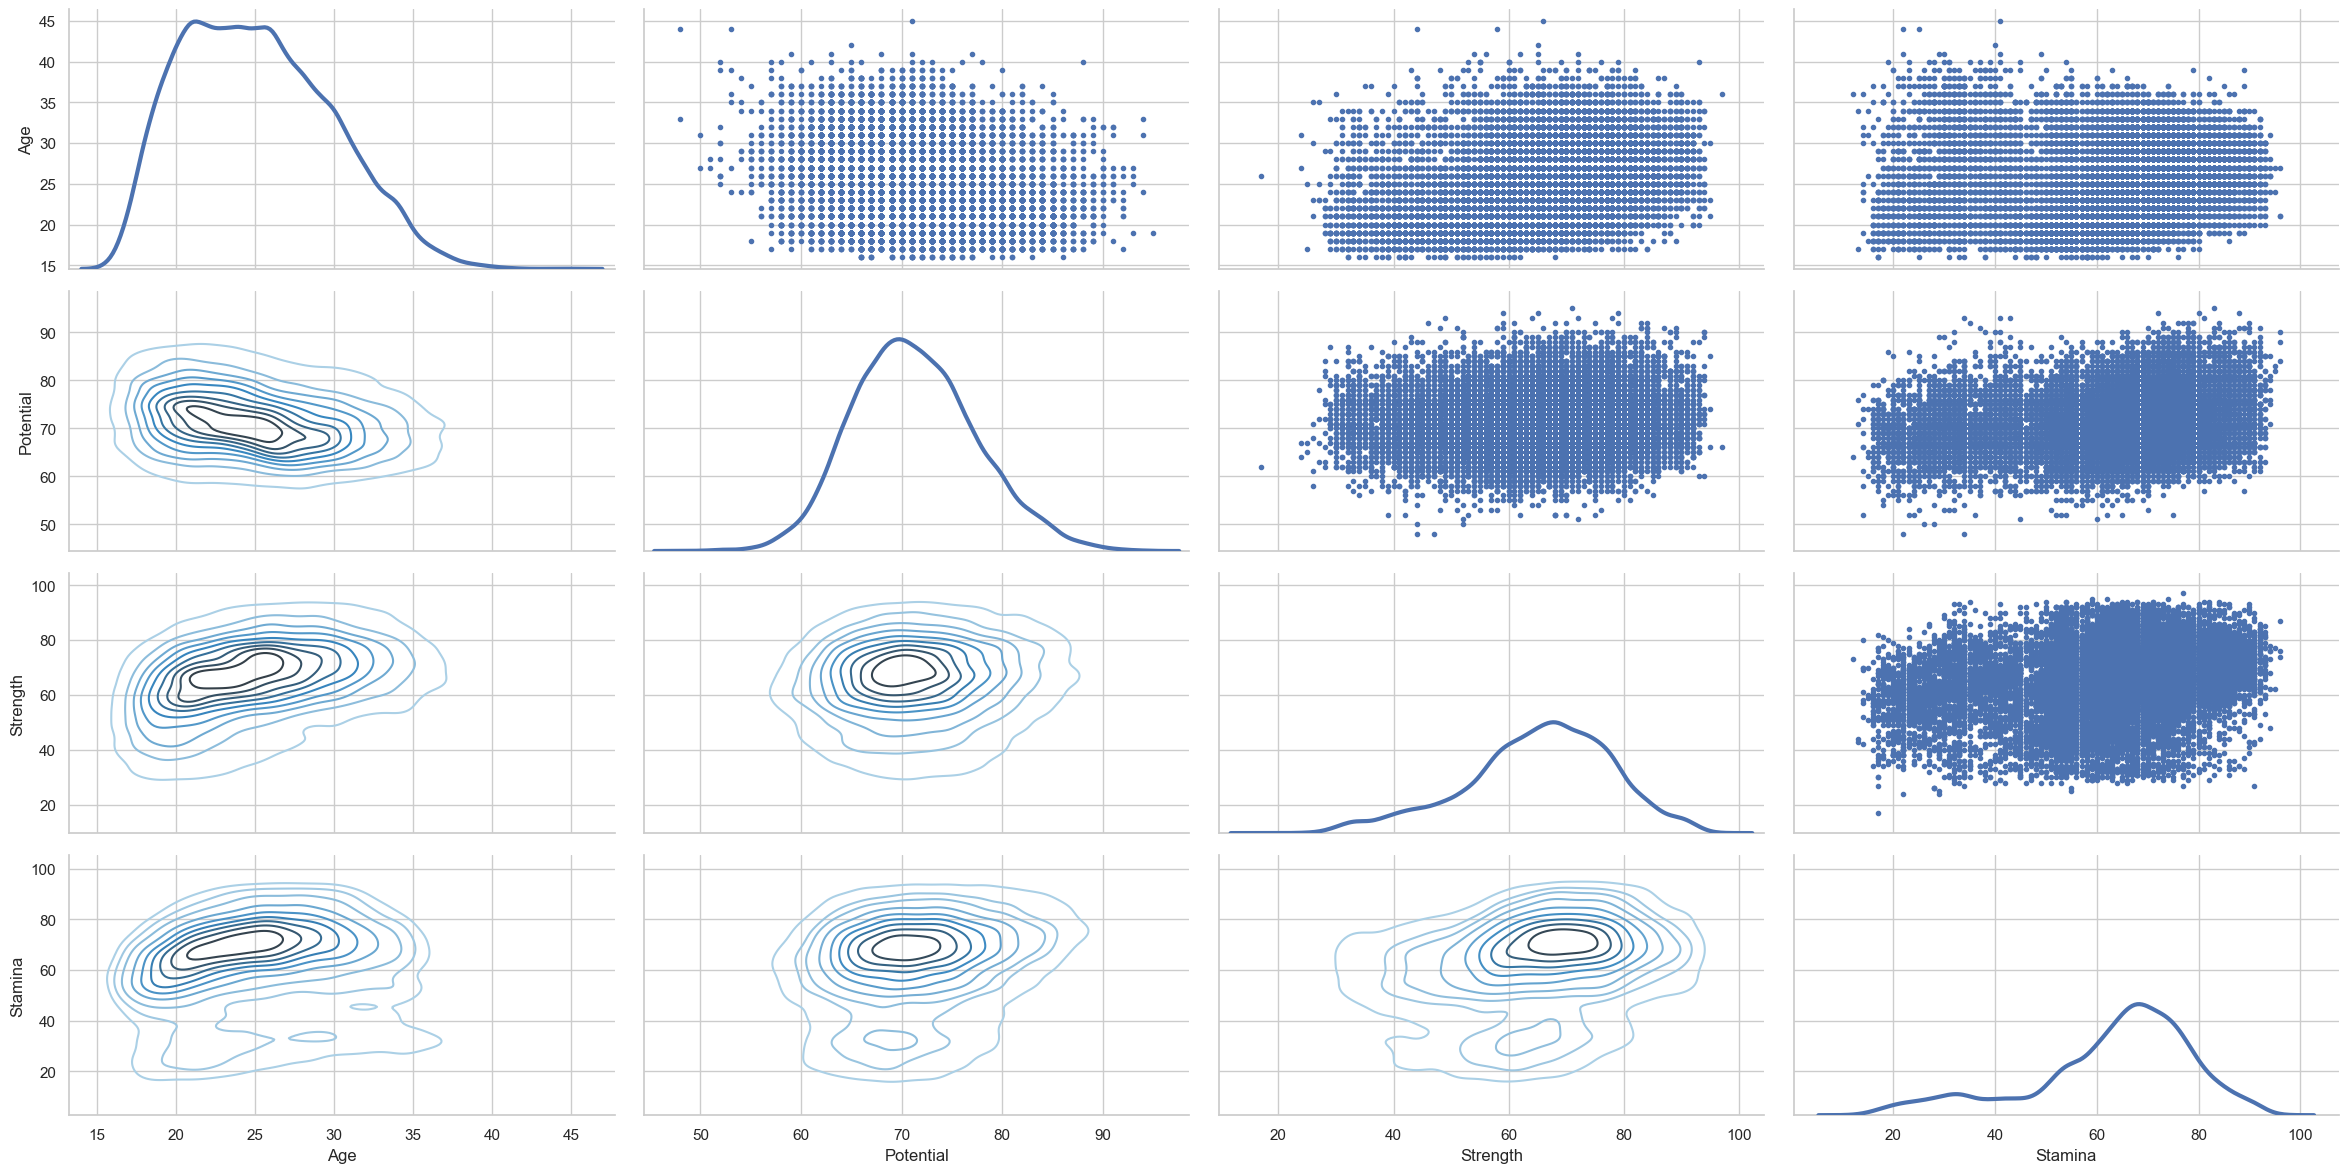

In [73]:
g = sns.PairGrid(fifa19_new, palette='Set1', height=3, aspect=2)
g = g.map_upper(plt.scatter, marker='.')
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

## Seaborn JointGrid() Function

- This function provides a grid for drawing a bivariate plot with marginal univariate plots.
- It set up the grid of subplots.

**We can initialize the figure and add plots using default parameters as follows:**

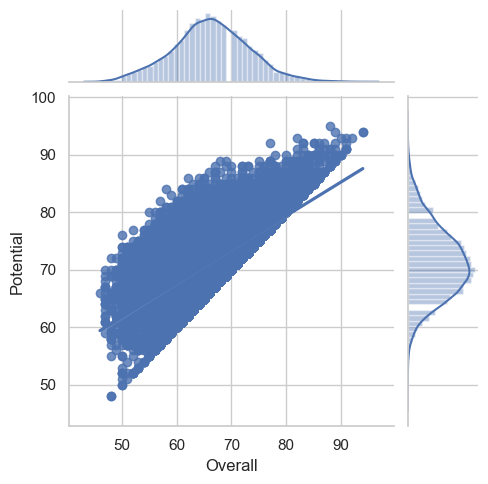

In [80]:
g = sns.JointGrid(data=fifa19, x='Overall', y='Potential', height=5, ratio=4)
g = g.plot(sns.regplot, sns.distplot)
plt.show()

**We can draw the join and marginal plots separately, which allows finer-level control other parameters as follows:**

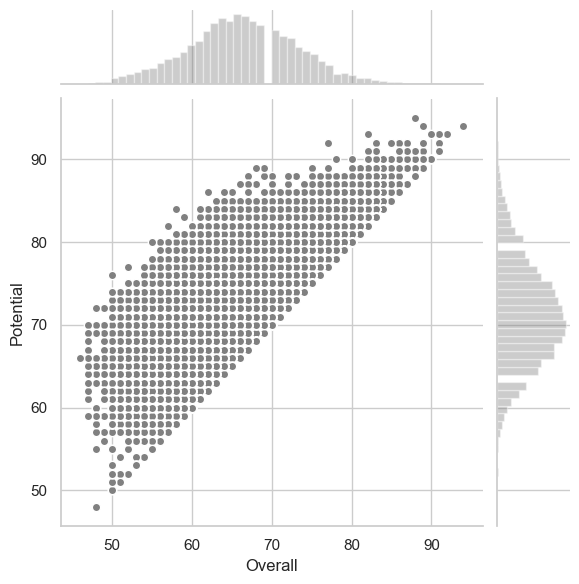

In [81]:
import matplotlib.pyplot as plt

g = sns.JointGrid(data=fifa19, x='Overall', y='Potential')
g = g.plot_joint(plt.scatter, color='0.5', edgecolor='white')
g = g.plot_marginals(sns.distplot, kde=False, color='0.5')
plt.show()

**We can remove the space between the joint and marginal axes as follows:**

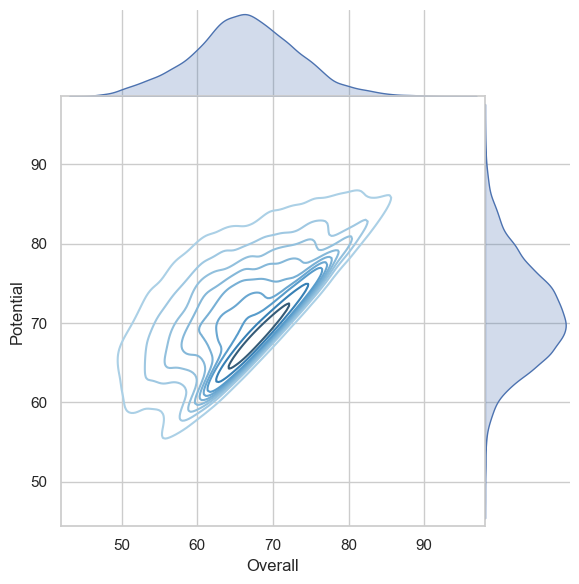

In [82]:
g = sns.JointGrid(data=fifa19, x='Overall', y='Potential', space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)
plt.show()

**We can draw a smaller plot with relatively larger marginal axes as follows:**

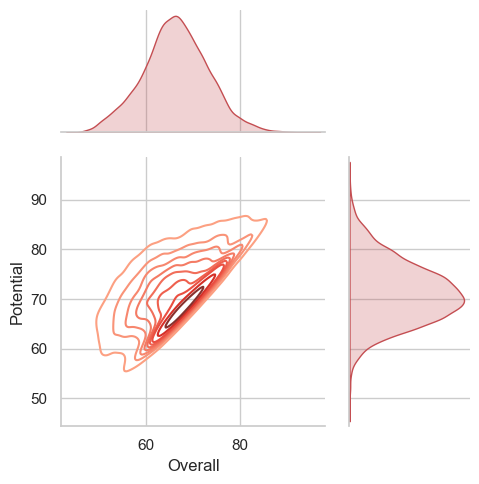

In [83]:
g = sns.JointGrid(data=fifa19, x='Overall', y='Potential', height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap='Reds_d')
g = g.plot_marginals(sns.kdeplot, shade=True, color='r')
plt.show()

# Controlling the size and shape of the plot

- The default plots made by `regplot()` and `lmplot()` look the same but on axes that have a different size and shape. 
- This is because `regplot()` is an “axes-level” function draws onto a specific axes. 
- This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. 
- If no axes object is explicitly provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions.

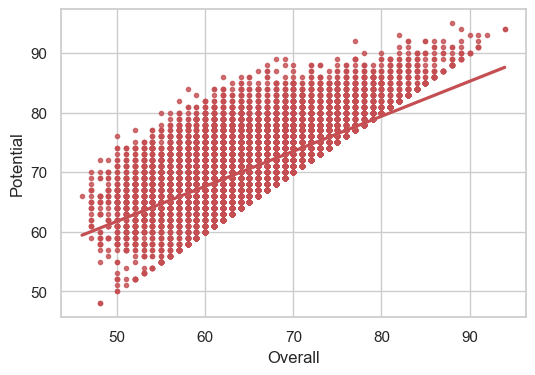

In [88]:
f, axes = plt.subplots(figsize=(6, 4))
axes = sns.regplot(data=fifa19, x='Overall', y='Potential', marker='.', color='r')
plt.show()

**In contrast, the size and shape of the `lmplot()` figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself.**

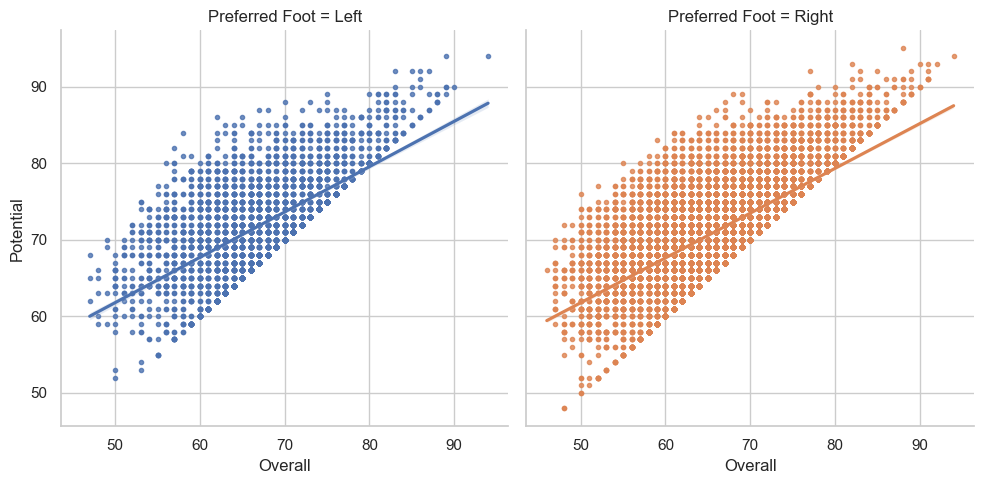

In [90]:
sns.lmplot(
    data=fifa19, 
    x='Overall', 
    y='Potential', 
    col='Preferred Foot', 
    hue='Preferred Foot', 
    markers='.', 
    col_wrap=2, 
    height=5, 
    aspect=1
)

plt.show()

# Seaborn Figure Styles

- There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white` and `ticks`. 
- They are each suited to different applications and personal preferences. 
- The default theme is darkgrid. 
- The grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. 
- The whitegrid theme is similar, but it is better suited to plots with heavy data elements.

**We will define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters as follows:**

In [91]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

**This is what the plot looks like with matplotlib default parameters:**

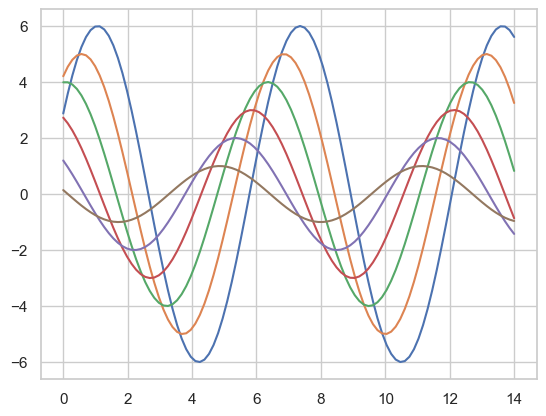

In [92]:
sinplot()

**To switch to seaborn defaults, we need to call the set() function as follows:**

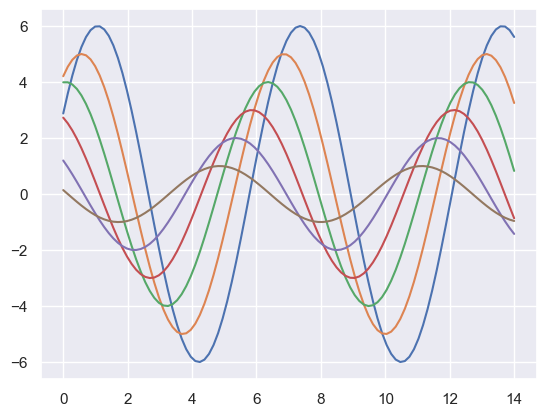

In [93]:
sns.set()
sinplot()

**We can set different styles as follows:**

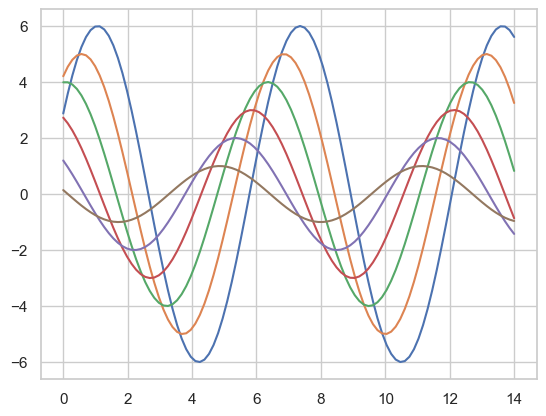

In [94]:
sns.set_style('whitegrid')
sinplot()

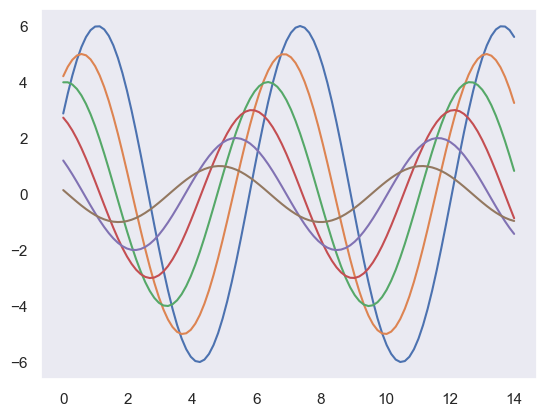

In [95]:
sns.set_style('dark')
sinplot()

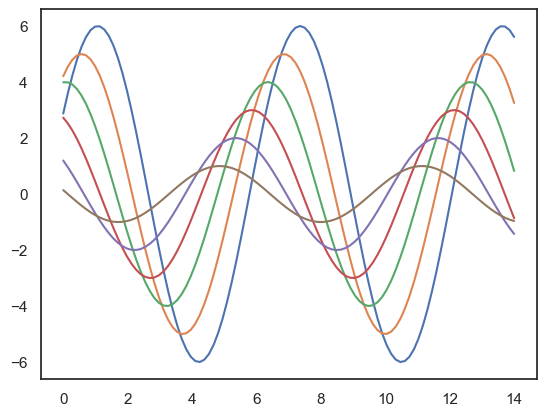

In [96]:
sns.set_style('white')
sinplot()

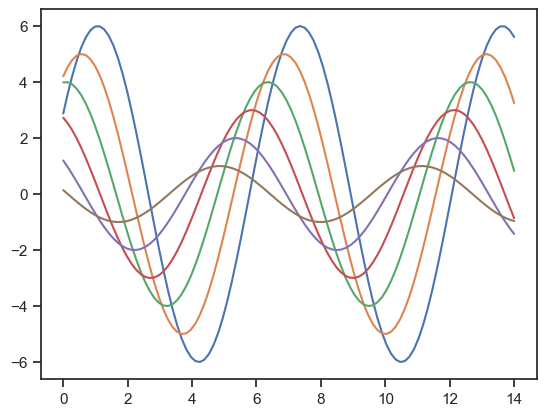

In [98]:
sns.set_style('ticks')
sinplot()

# End